# Goal: Can we predict the climate given a certain concentration of carbon dioxide in the atmosphere?
___
Climate change is a natural phenomenon that refers to changes in temperature and other weather conditions. Although it is a natural process, humans have impacted or even may have accelerated climate change. As human civilization become more technological, so does the concentration of green house gases. One such gas is carbon dioxide, a byproduct from the production of energy from the burning of fossil fuels. We will be investigating how carbon dioxide is altering the climate of various cities on Earth. With this information, the EPA can focus on which areas around the world would benefit from limiting emissions of carbon dioxide .

# Import libraries
___

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import glob
import os

# Import dataframes
___
Load data by using `pd.read_csv`. We can create a function that will access the `/Data` folder.

In [2]:
def read_csv(directory):
    # Directory that holds the csv files
    path = directory
    # Get all files that end with '.csv'
    all_files = glob.glob(os.path.join(path, '*.csv'))

    l = []
    # For loop that iterates through each csv file and stores them in a list
    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=0)
        l.append(df)
    # Concatenate the dataframes into one
    df = pd.concat(l, axis=0, ignore_index=True)
    
    return df

Two dataframes are produced: `climate_df` and `carbon_df`.

In [3]:
climate_df = read_csv('Climate_data')
carbon_df = read_csv('CO2_data')

# Data preparation
___
Although both data is provided by NOAA, they are taken from two different sites. The first step we take is renaming the columns (NOAA uses acroynms for their climate data) and changing the date from a string to datetime.

### Climate data
___
To prepare the climate data, we first change the date into datetime.

In [4]:
# Changed date into datetime
climate_df['DATE'] = pd.to_datetime(climate_df['DATE'])

In [5]:
# Change the names of the columns
columns = {'DATE':'Date',
           'ADPT':'Average Dew Point Temperature', 
           'AWND':'Average Wind Speed',
           'PRCP':'Total Monthly Precipitation',
           'PSUN':'Monthly Average of the daily percents of possible sunshine',
           'TAVG':'Average Monthly Temperature',
           'TMAX':'Monthly Maximum Temperature',
           'TMIN':'Monthly Minimum Temperature',
           'RHAV':'Relative Humidity'}

climate_df = climate_df.rename(columns=columns)

The climate data contains climate from different cities. We can code a function to create a new dataframe depending on its city.

In [6]:
# Decrease the size of the dataframe to these specific columns
cols = ['Date',
        'Average Dew Point Temperature',
        'Average Wind Speed',
        'Total Monthly Precipitation',
        'Monthly Average of the daily percents of possible sunshine',
        'Average Monthly Temperature',
        'Monthly Maximum Temperature',
        'Monthly Minimum Temperature',
        'Relative Humidity']

# Function that takes the name of the city, columns names, dataframe holding the data, and the column 'NAME'
def create_df(name, column_names, dataframe, site='NAME'):
    # Getting the rows that have the name of a specific city
    df = dataframe[dataframe[site] == name]
    # Getting dataframe of only the specified columns
    df = df[column_names]
    # Returns the dataframe with the date as its index
    return df.set_index('Date')

We can run the function to create dataframes of these cities:
- BOULDER, CO US
- HILO INTERNATIONAL AIRPORT 87, HI US
- HOHENPEISSENBERG, GM
- CAPE FLORIDA, FL US
- LOS ANGELES DOWNTOWN USC, CA US
- SAN FRANCISCO DOWNTOWN, CA US
- VESTMANNAEYJAR, IC
- TEMPLE DRAUGHTON MIL, TX US

In [7]:
bou = create_df('BOULDER, CO US', cols, climate_df)
hil = create_df('HILO INTERNATIONAL AIRPORT 87, HI US', cols, climate_df)
hoh = create_df('HOHENPEISSENBERG, GM', cols, climate_df)
cap = create_df('CAPE FLORIDA, FL US', cols, climate_df)
los = create_df('LOS ANGELES DOWNTOWN USC, CA US', cols, climate_df)
san = create_df('SAN FRANCISCO DOWNTOWN, CA US', cols, climate_df)
ice = create_df('VESTMANNAEYJAR, IC', cols, climate_df)
tem = create_df('TEMPLE DRAUGHTON MIL, TX US', cols, climate_df)

### Carbon emission data
___

The date of the carbon emission data is stored in separate columns (year, month, day, hour, etc). We will create a new column that merges the `year` and `month` and will be changed into datetime.

In [8]:
carbon_df[['year', 'month']] = carbon_df[['year', 'month']].astype(str)
carbon_df['Date'] = carbon_df[['year', 'month']].agg(''.join, axis=1)
carbon_df['Date'] = carbon_df['Date'].astype(int)
carbon_df['Date'] = pd.to_datetime(carbon_df['Date'], format='%Y%m')

We can run the same function to create a dataframe of CO2 concentration of specific cities. However, the cities are written as three character strings under the `site_code` column.
- BAO - Boulder, CO
- MLO - Mauna Loa, HI
- HPB - Hohenpeissenberg, GM
- KEY - Key Biscayne, FL
- MWO - Los Angeles, CA
- STR - San Francisco, CA
- ICE - Vestmannaeyjar, IC
- WKT - Moody, TX

In [9]:
cols_co2 = ['Date', 'site_code', 'value',]

bou_co2 = create_df('BAO', cols_co2, carbon_df, site='site_code')
hil_co2 = create_df('MLO', cols_co2, carbon_df, site='site_code')
hoh_co2 = create_df('HPB', cols_co2, carbon_df, site='site_code')
cap_co2 = create_df('KEY', cols_co2, carbon_df, site='site_code')
los_co2 = create_df('MWO', cols_co2, carbon_df, site='site_code')
san_co2 = create_df('STR', cols_co2, carbon_df, site='site_code')
ice_co2 = create_df('ICE', cols_co2, carbon_df, site='site_code')
tem_co2 = create_df('WKT', cols_co2, carbon_df, site='site_code')

# Data analysis/visualization
___

To visualize the data, we can plot the data to see any abnormalities like outliers or missing values. A function will be coded where the y is the column name and the x is the date. The `bin_num` is set to 100 as default but can be changed.

In [10]:
def plot(y_value, df, x_value='Date', bin_num=100):    
    # Store median value to plot a vertical line on the histogram plot
    median = df[y_value].median()
    
    sns.set(rc={'figure.figsize':(10,10)})
    sns.set_style('white')
    # Scatter plot
    fig, axs = plt.subplots(2, 1, figsize=(15, 10), dpi=100)
    sns.scatterplot(data=df, x=x_value, y=y_value, ax=axs[0])
    # Histogram plot
    sns.histplot(data=df[y_value], kde=True, bins=bin_num, ax=axs[1])
    axs[1].axvline(median, color='r')
    plt.tight_layout()

### Climate data visualization
___

Because we want to visualize each column of the climate data, we can create a for loop that will loop through all the columns and plot accordingly.

In [11]:
cols_ = ['Average Dew Point Temperature',
        'Average Wind Speed',
        'Total Monthly Precipitation',
        'Monthly Average of the daily percents of possible sunshine',
        'Average Monthly Temperature',
        'Monthly Maximum Temperature',
        'Monthly Minimum Temperature',
        'Relative Humidity']

def plot_climate(df):
    # Iterate through each column and run the plot function
    for col in cols_:
        # Not all columns hold data so those will be omitted when visualizing the data
        if len(df[col]) != df[col].isna().sum():
            plot(col, df)

__Visualizing the climate data of Hilo International Airport, Hawaii:__

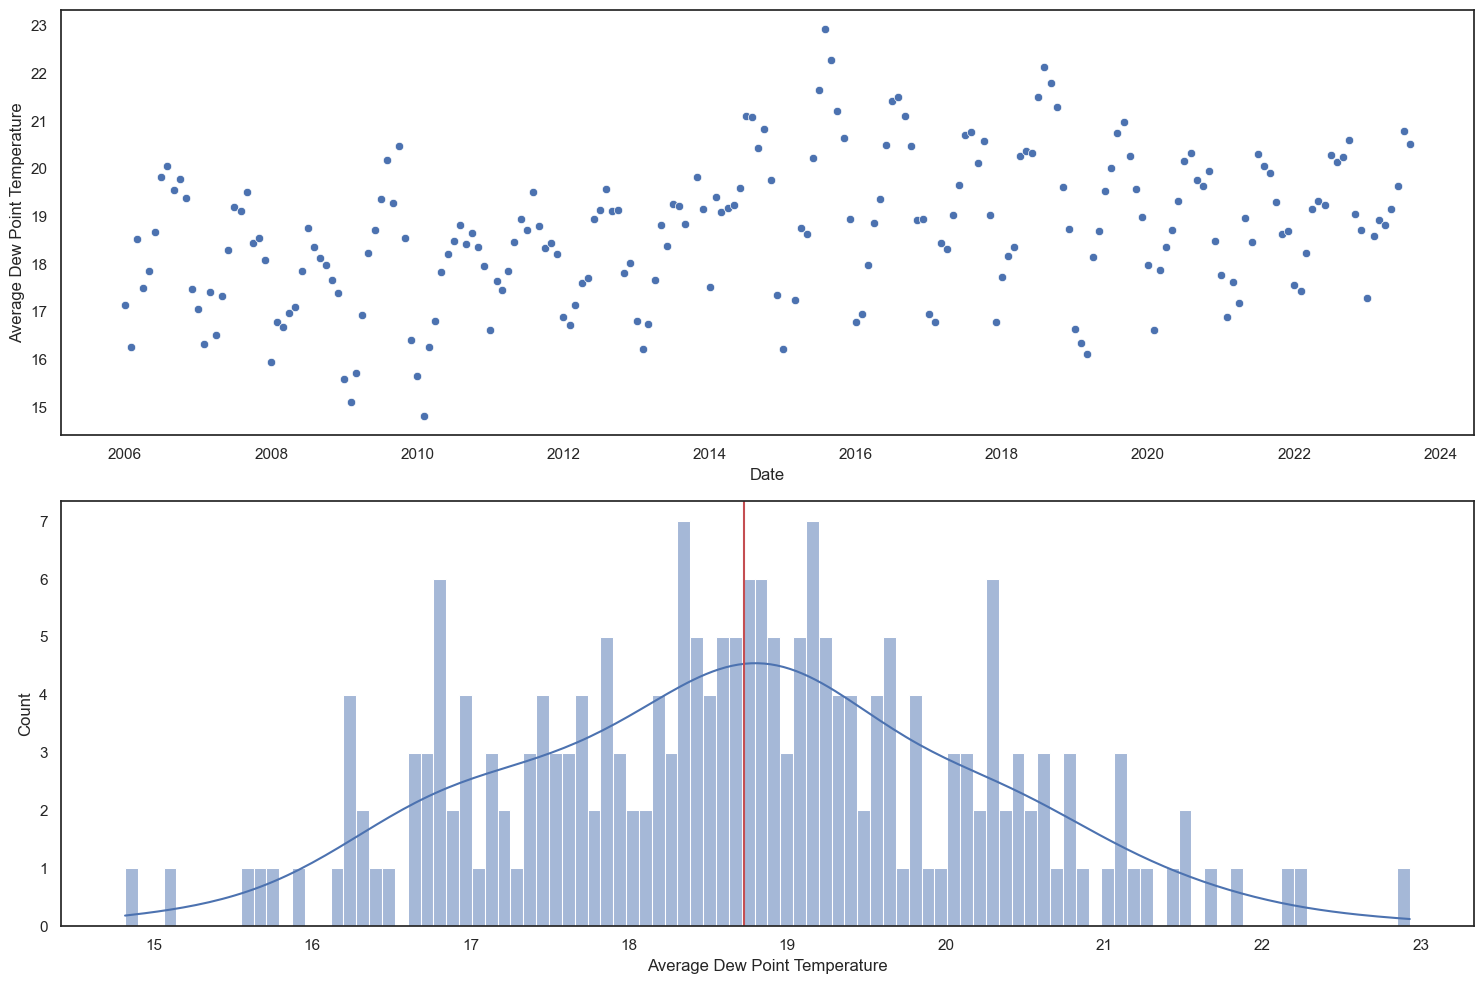

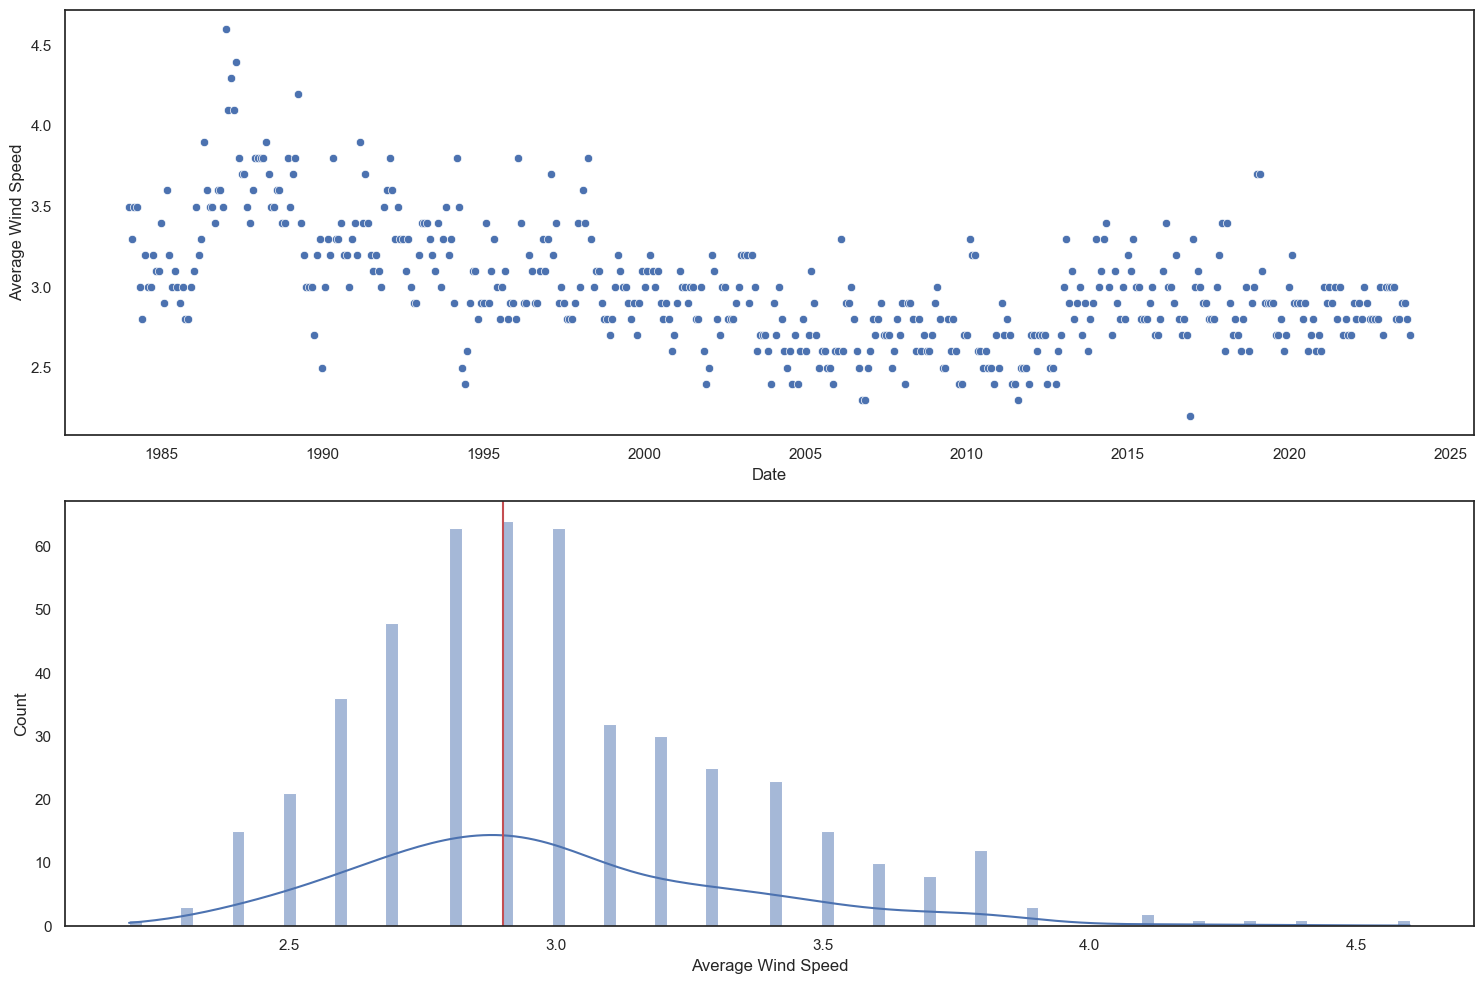

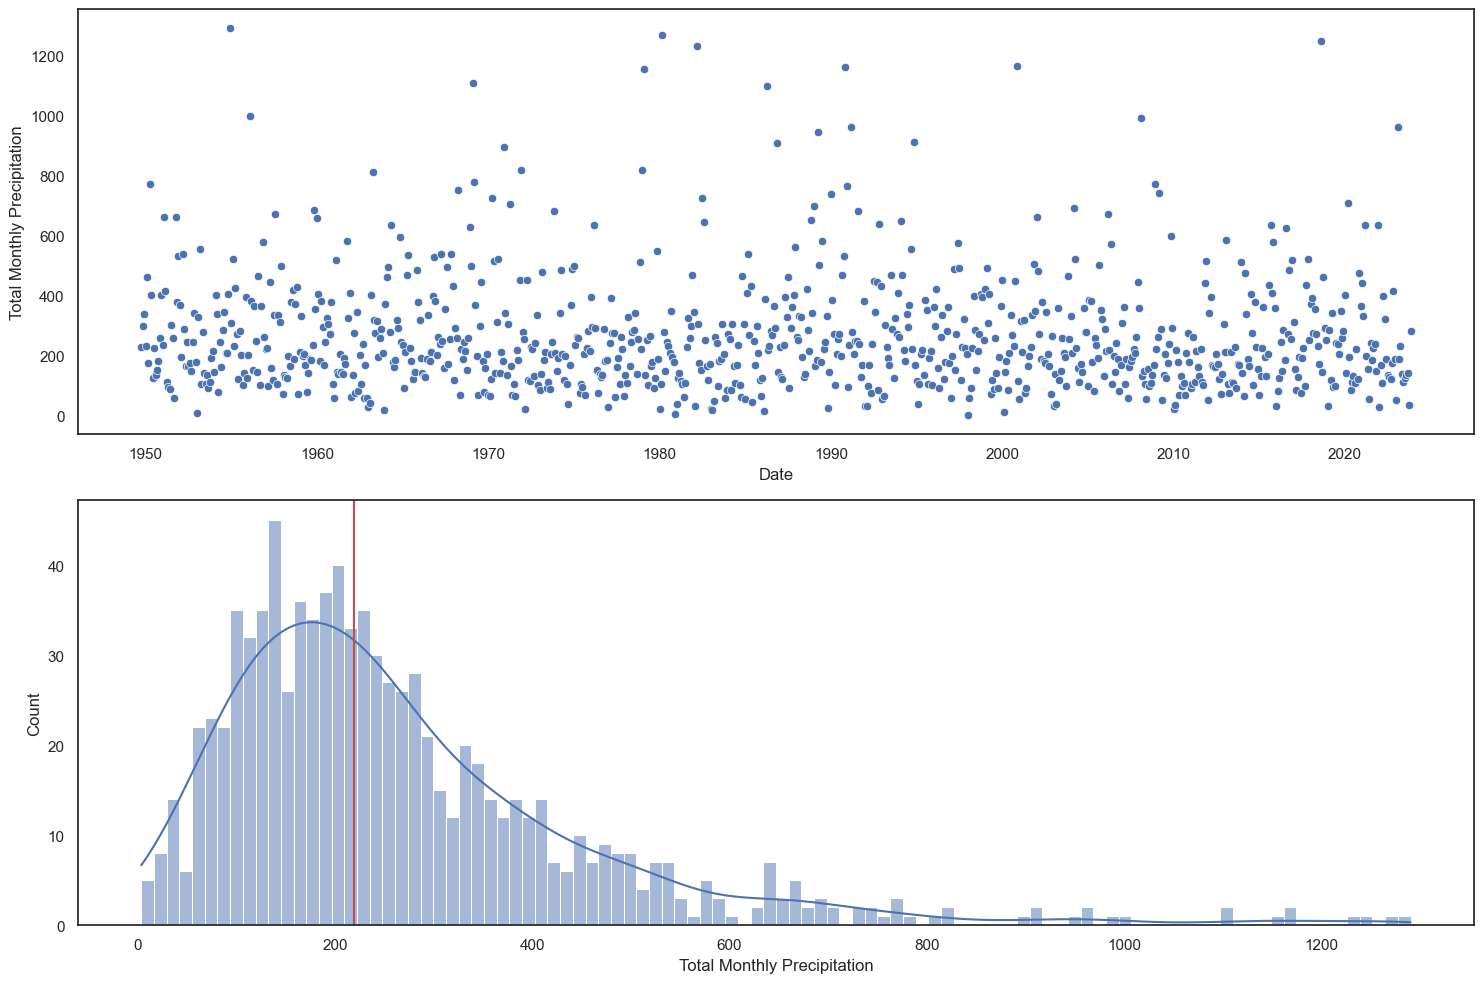

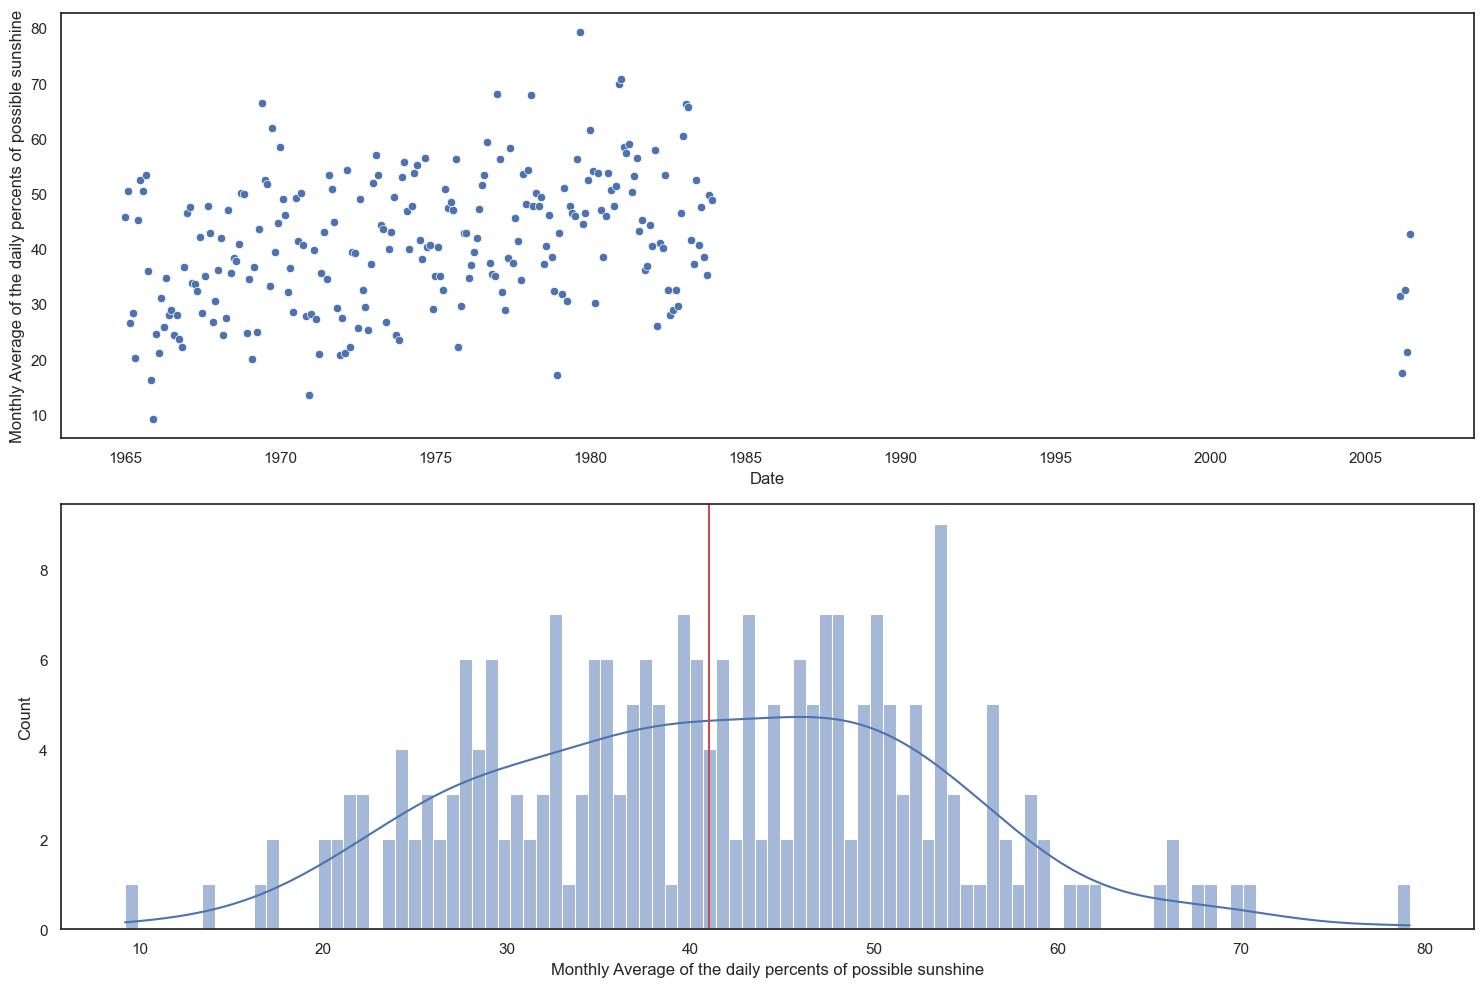

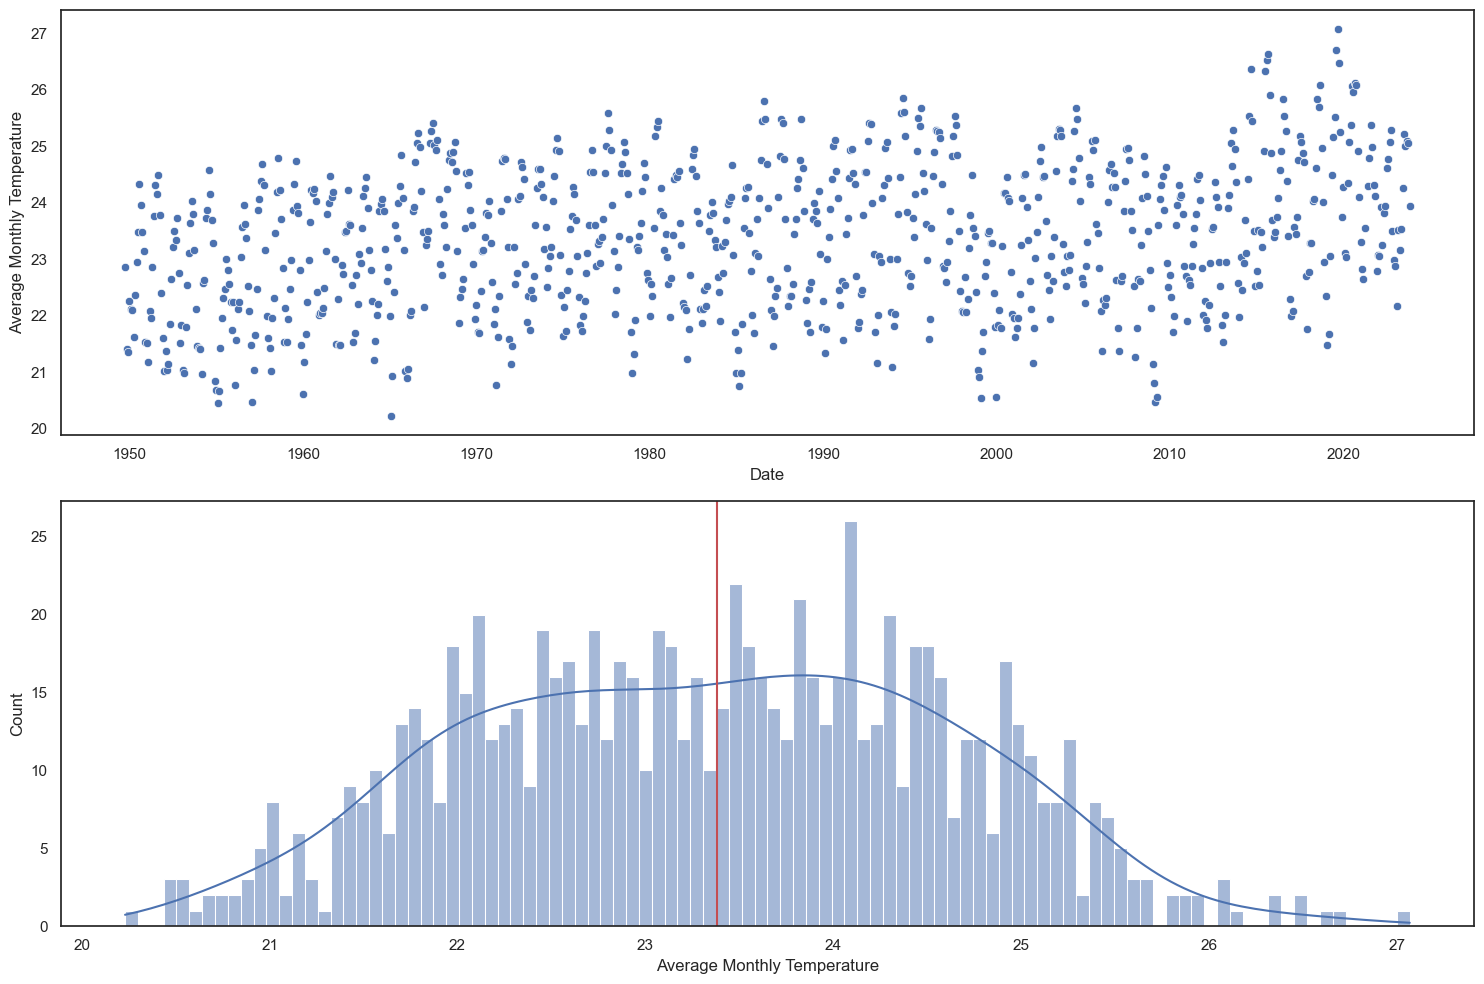

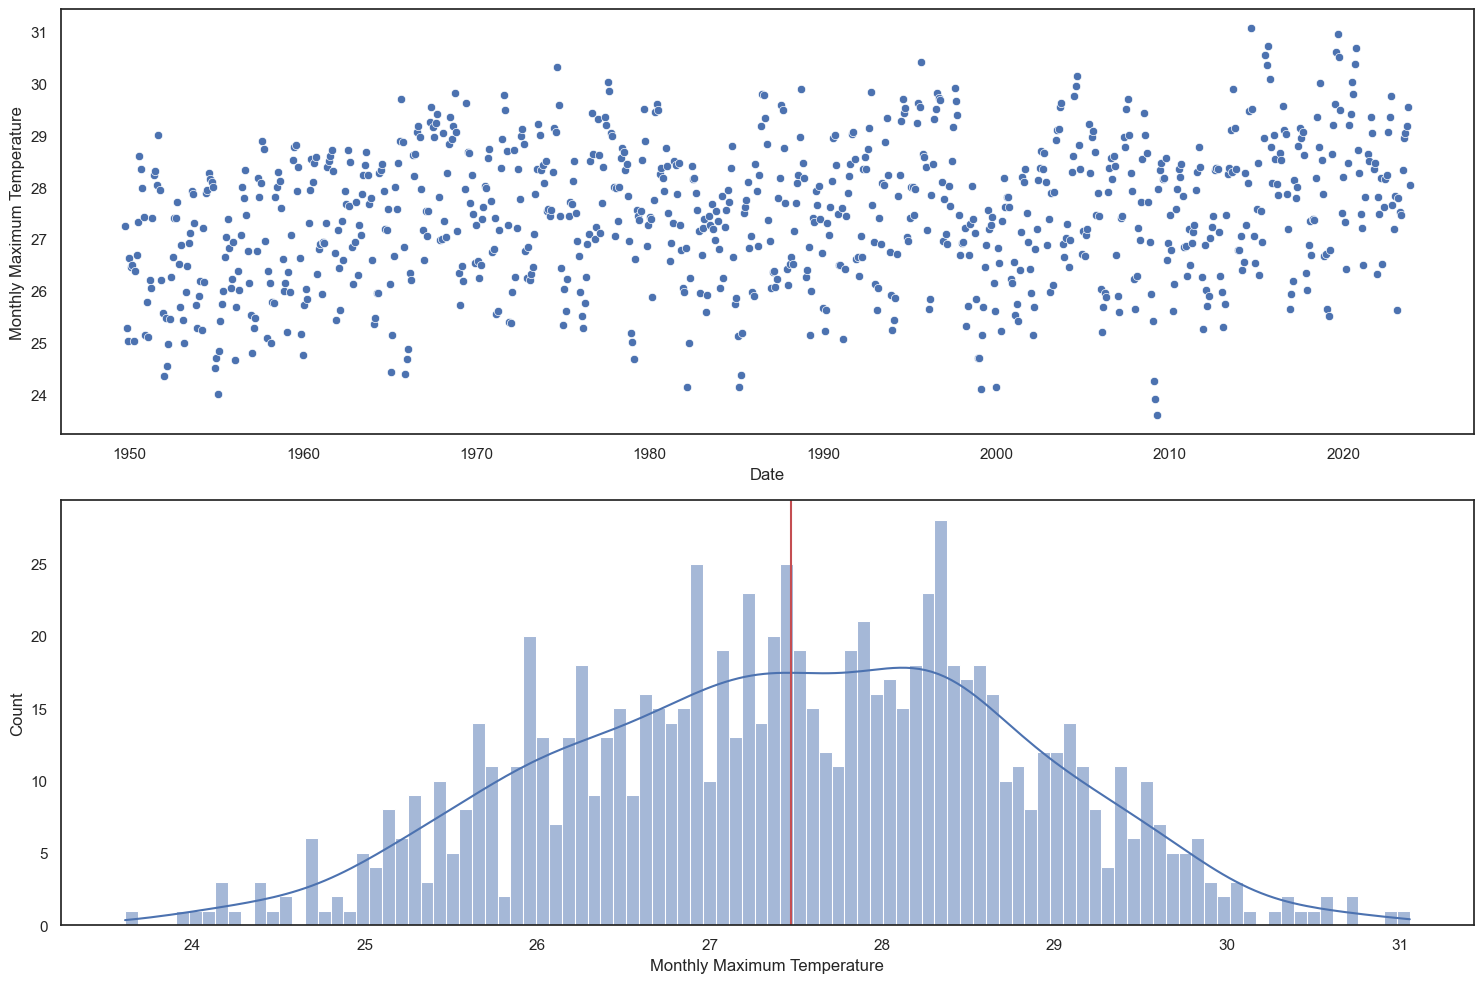

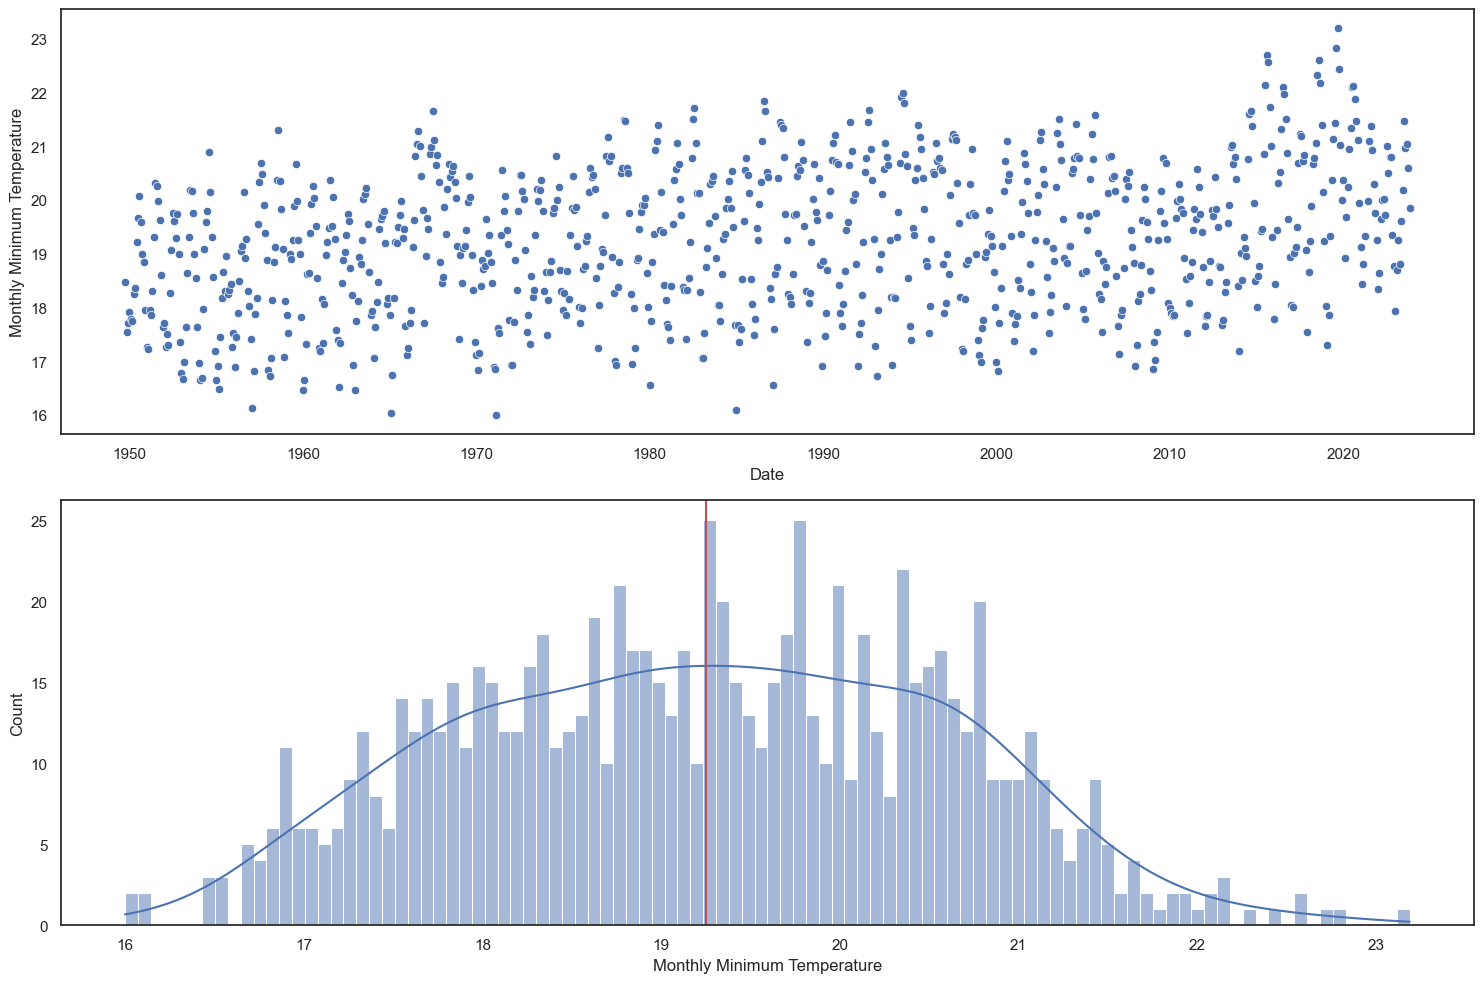

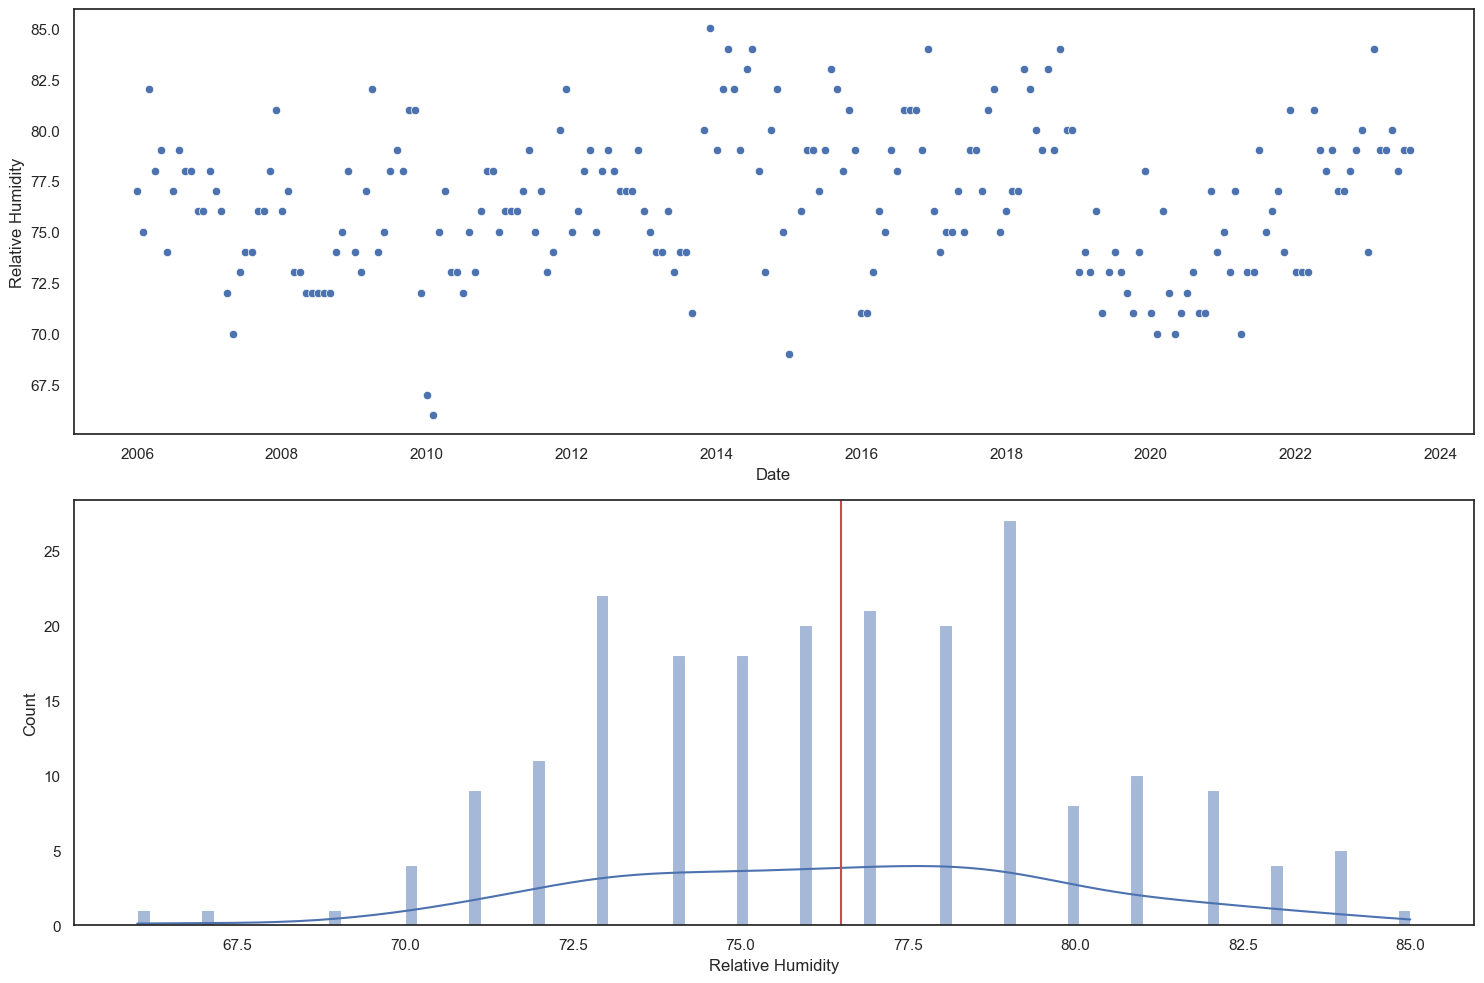

In [12]:
plot_climate(hil)

There does not seem to be any ridculous value present in this data. This method is repeated for the remaining climate datasets and the results are similar. Although there may be outliers, we decided not to replace or omit them as there may be a reason why those data points exist.

### Carbon emission analysis
___
We can apply the function coded above, `plot()`, where the `y_value` is `value` and `df` is the carbon dioxide concentration of each city.

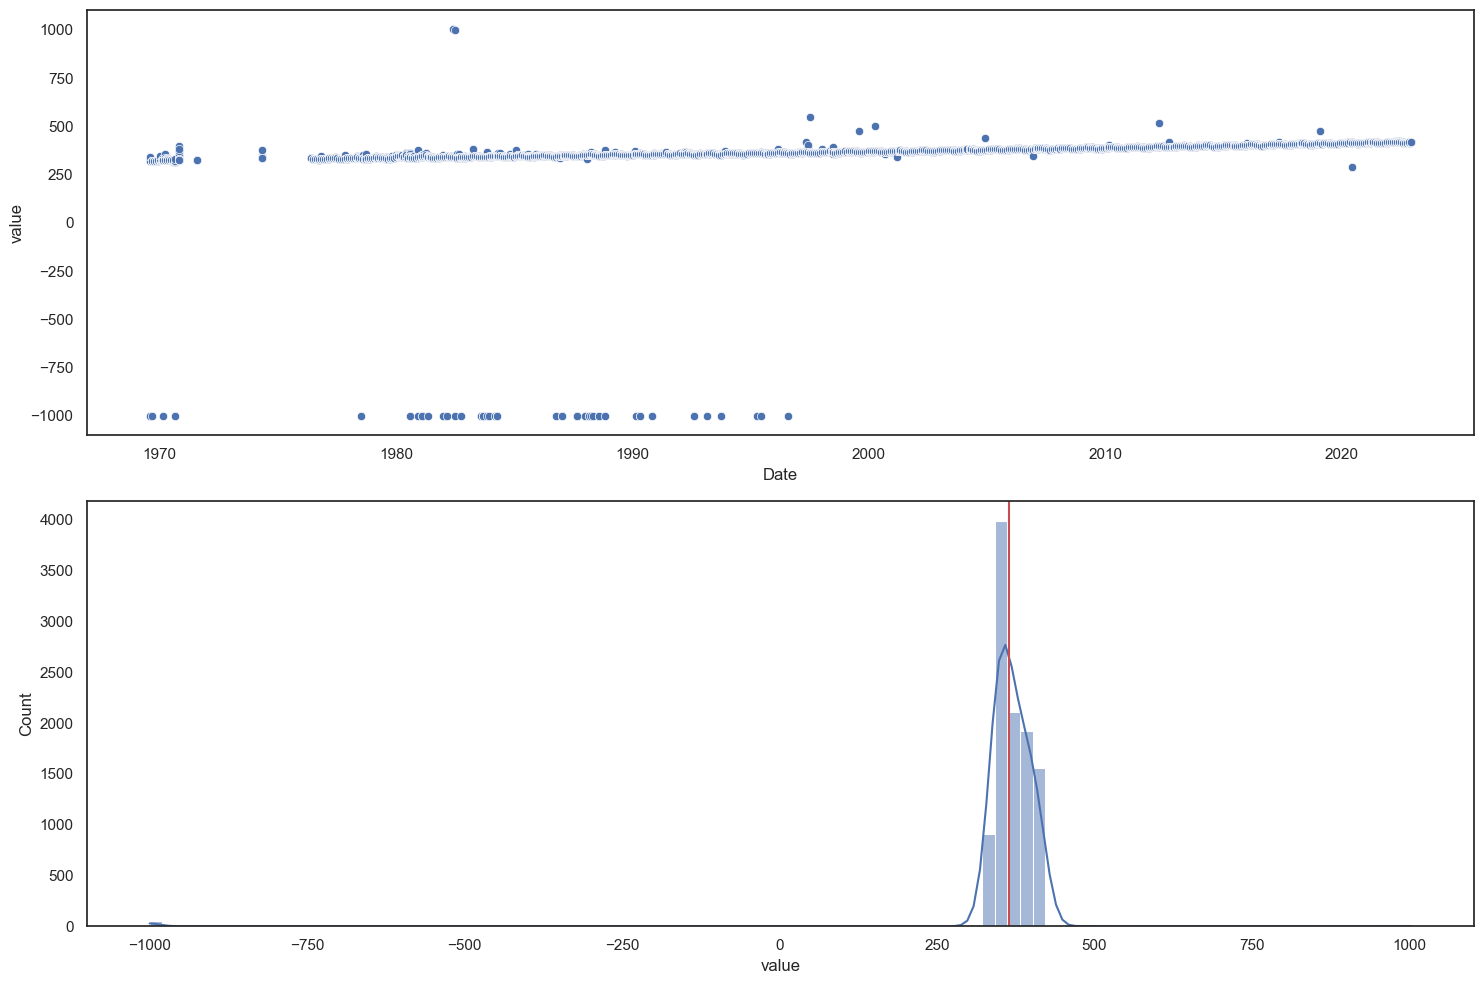

In [13]:
plot('value', df=hil_co2)

NOAA uses the -999.99 value to represent null values. Therefore we will replace them with the median first. Then we can replace any remaining outliers with the median. This method will prevent an absurd standard deviation caused by the -999.99 values.

In [14]:
def outlier(df, column='value'):
    # Calculate the median
    median = df[column].median()
    # Replace the negative numbers with the median
    df.loc[df['value'] < 0, 'value'] = median
    # We will find the outliers that are 3 standard deviations away from the mean
    std = df[column].std()
    outliers = (df[column] - median).abs() > 3*std
    # Replace the outliers with the median
    df.loc[outliers] = np.nan
    df[column].fillna(median, inplace=True)
    
    return df

In [15]:
# Perform the function on all datasets
bou_co2 = outlier(bou_co2)
hil_co2 = outlier(hil_co2)
hoh_co2 = outlier(hoh_co2)
cap_co2 = outlier(cap_co2)
los_co2 = outlier(los_co2)
san_co2 = outlier(san_co2)
ice_co2 = outlier(ice_co2)
tem_co2 = outlier(tem_co2)

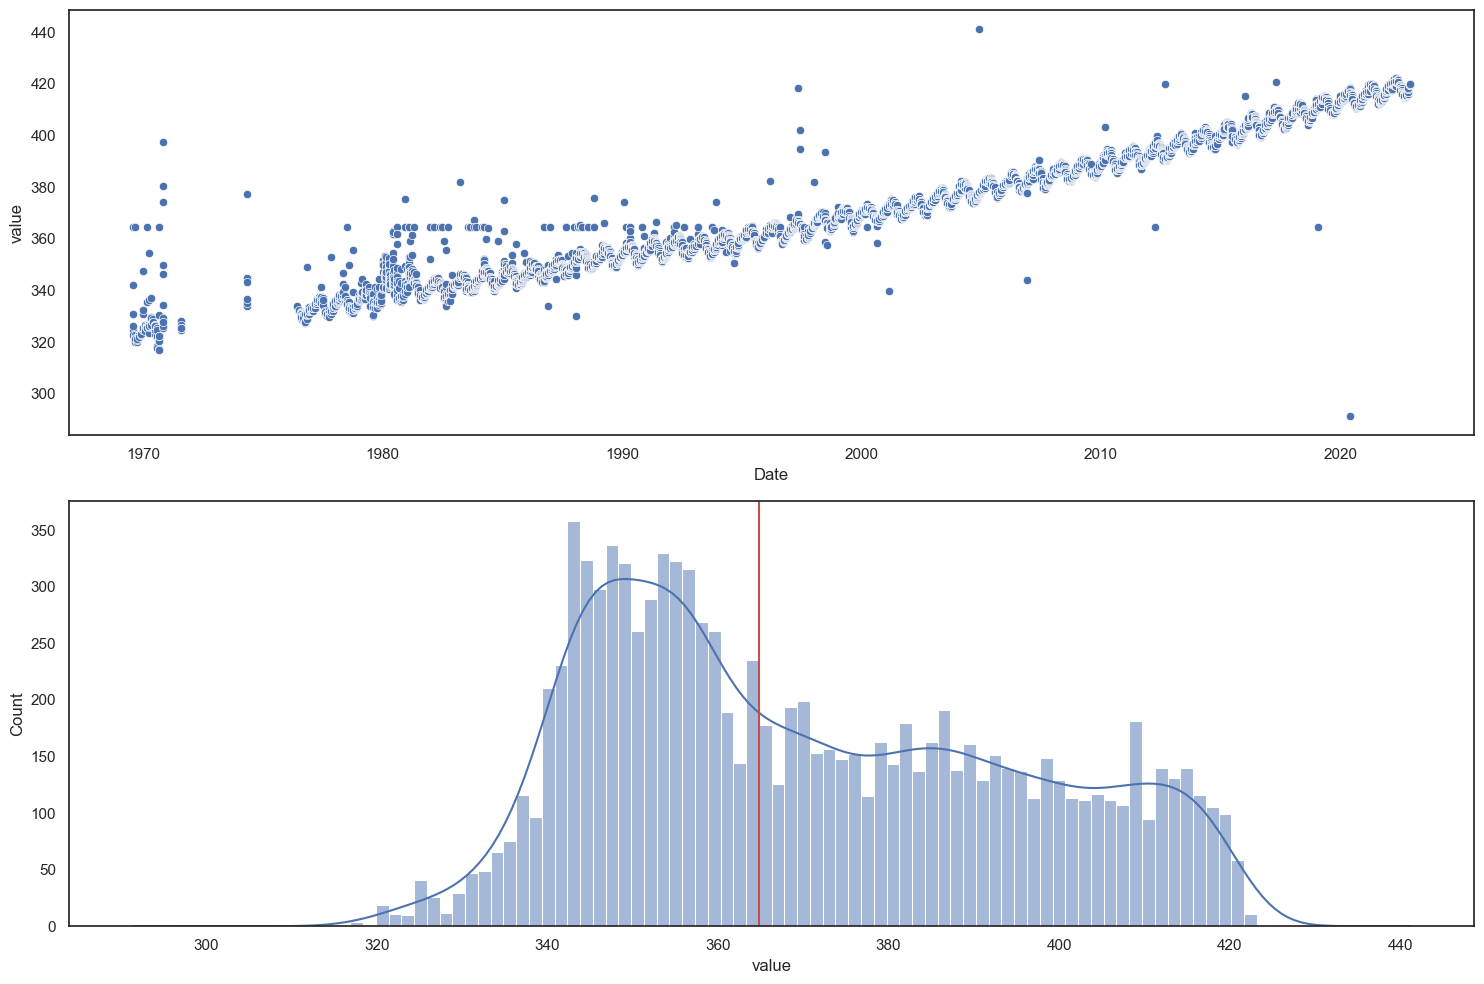

In [16]:
# Plot to observe any changes/improvements
plot('value', df=hil_co2)

__Using a boxplot for better visualization__
<br>The number of dots in the scatterplot may be overwhelming. We can see the trend a bit easier when using a boxplot.

In [17]:
# Function for a boxplot where the y_value is set 'value' (CO2 concentration) by default
def boxplot(df, title, y_value='value'):
    sns.set(rc={'figure.figsize':(15,8)})
    sns.set_style('white')
    sns.boxplot(data=df, x=df.index, y=y_value).set_title(title, fontsize=25)
    plt.ylabel('CO2 Emissions')
    plt.xticks(rotation=90)

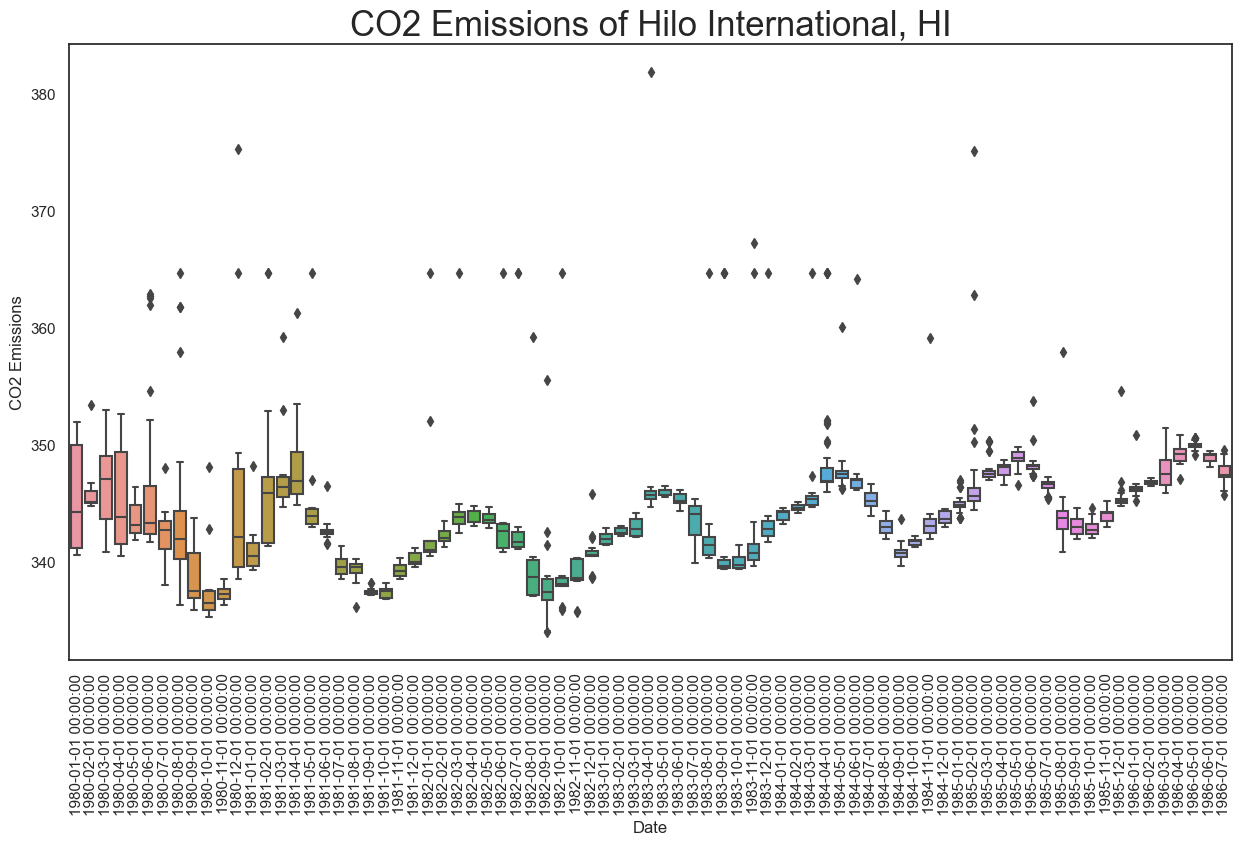

In [18]:
boxplot(hil_co2['1980-01-01':'1986-07-01'], title='CO2 Emissions of Hilo International, HI')

We observe a consistent repeated value in the middle of 360 and 370. This is the median value that was replaced when filling in null values and outliers. Another thing to note is that this carbon emission data is taken from a near by volcano __Mauna Loa__. An active volcano may be the reason why we are still seeing some outliers every month or so.

### Combining climate and carbon emission dataframes
___
The dataframe will be combined according to the cities. The rows of each column will be replaced by the averages of each month.

In [19]:
def monthly_averages(climate_df, co2_df):
    # Group the data according to months
    grouper = pd.Grouper(level='Date', freq='M')
    # Create a new dataframe holding the monthly averages of each column
    df = climate_df.groupby(grouper).mean()
    df1 = co2_df.groupby(grouper).mean()
    # Join the two dataframes
    return df.join(df1, lsuffix='_left', rsuffix='_right', how='outer')

In [20]:
# Repeat the function for each dataframe according to their city.
bou_monthly = monthly_averages(bou, bou_co2)
hil_monthly = monthly_averages(hil, hil_co2)
hoh_monthly = monthly_averages(hoh, hoh_co2)
cap_monthly = monthly_averages(cap, cap_co2)
los_monthly = monthly_averages(los, los_co2)
san_monthly = monthly_averages(san, san_co2)
ice_monthly = monthly_averages(ice, ice_co2)
tem_monthly = monthly_averages(tem, tem_co2)

Upon further inspection of the newly formed data, the `Average Monthly Temperature` data stops short compared to the carbon concentration data. Additionally, the carbon concentration data starts later. Because we are trying to predict the climate, given a certain carbon concentration, we will start drop the rows before `1992-10-30` and after `2011-01-01`.

In [21]:
ice_monthly = ice_monthly.loc[(ice_monthly.index > '1992-10-30') & (ice_monthly.index < '2011-01-01')]

In [22]:
list_df = [bou_monthly, hil_monthly,
           hoh_monthly, cap_monthly,
           los_monthly, san_monthly,
           ice_monthly, tem_monthly]
# Create a for loop that loops through the list and  each column
for df in list_df:
    # Drop rows that have null carbon dioxide concentration values
    df.dropna(subset=['value'],how='any',inplace=True)

We have replaced the null values for carbon dioxide concentration but not for climate. Since we have decided to keep the outliers for the climate data, and no ridiculous values exist (observed from the plots above) we can safely replace the null values with their corresponding median values.

In [23]:
# Create a for loop that loops through the list and  each column
for df in list_df:
    for col in df.columns:
        # Given that the number of null values are less that 25% of the column,
        # Replace it with the median
        if df[col].isna().sum() < 0.25*len(df[col]):
            median = df[col].median()
            df[col].fillna(median, inplace=True)

Because this is a time series data, there may be noise. We will reduce noise by taking the square root. Converting the temperature to Kelvin will obtain only positive values.

In [24]:
# Get rid of negative values by converting temperature into Kelvin
for df in list_df:
    df[['Average Dew Point Temperature',
        'Average Monthly Temperature',
        'Monthly Maximum Temperature',
        'Monthly Minimum Temperature']] += 273

In [25]:
# Inspect the dataframes
hil_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 576 entries, 1969-08-31 to 2022-12-31
Data columns (total 9 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Average Dew Point Temperature                               202 non-null    float64
 1   Average Wind Speed                                          576 non-null    float64
 2   Total Monthly Precipitation                                 576 non-null    float64
 3   Monthly Average of the daily percents of possible sunshine  113 non-null    float64
 4   Average Monthly Temperature                                 576 non-null    float64
 5   Monthly Maximum Temperature                                 576 non-null    float64
 6   Monthly Minimum Temperature                                 576 non-null    float64
 7   Relative Humidity                                           202 non-nul

By running `df.info()` we see that some data have a few null values. Since we are mainly focusing on the `Average Monthly Temperature`, the rows that contain null values in this column are removed.

In [26]:
hoh_monthly = hoh_monthly[hoh_monthly['Average Monthly Temperature'].notna()]
cap_monthly = cap_monthly[cap_monthly['Average Monthly Temperature'].notna()]
tem_monthly = tem_monthly[tem_monthly['Average Monthly Temperature'].notna()]

__Correlation between carbon dioxide concentration and temperature__

In [27]:
print('Boulder, CO', bou_monthly[['Average Monthly Temperature', 'value']].corr(),
      '\n\nHilo International, HI', hil_monthly[['Average Monthly Temperature', 'value']].corr(),
      '\n\nHohenpeissenberg, GM', hoh_monthly[['Average Monthly Temperature', 'value']].corr(),
      '\n\nCape Florida, FL', cap_monthly[['Average Monthly Temperature', 'value']].corr(),
      '\n\nLos Angeles, CA', los_monthly[['Average Monthly Temperature', 'value']].corr(),
      '\n\nSan Francisco, CA', san_monthly[['Average Monthly Temperature', 'value']].corr(),
      '\n\nVestmannaeyjar, IC', ice_monthly[['Average Monthly Temperature', 'value']].corr(),
      '\n\nTemple, TX', tem_monthly[['Average Monthly Temperature', 'value']].corr())

Boulder, CO                              Average Monthly Temperature     value
Average Monthly Temperature                     1.000000 -0.405324
value                                          -0.405324  1.000000 

Hilo International, HI                              Average Monthly Temperature     value
Average Monthly Temperature                     1.000000  0.128277
value                                           0.128277  1.000000 

Hohenpeissenberg, GM                              Average Monthly Temperature     value
Average Monthly Temperature                     1.000000 -0.490213
value                                          -0.490213  1.000000 

Cape Florida, FL                              Average Monthly Temperature     value
Average Monthly Temperature                     1.000000  0.005746
value                                           0.005746  1.000000 

Los Angeles, CA                              Average Monthly Temperature     value
Average Monthly Temperature     

Interestingly enough, there a negative correlation between the two variables. The only positive correlation is the Hilo International Airport, Hawaii and Cape Florida, FL, although a very weak one. The higher correlation values may be due to the presence of a nearby volcano, or it could be that certain biomes are affected differently. The negative correlation on the otherhand does not entirely mean that carbon dioxide is harmless. There maybe other greenhouse gases that may be affecting these cities.

__Correlation between carbon dioxide concentration and total precipitation__

In [28]:
print('Boulder, CO', bou_monthly[['Total Monthly Precipitation', 'value']].corr(),
      '\n\nHilo International, HI', hil_monthly[['Total Monthly Precipitation', 'value']].corr(),
      '\n\nHohenpeissenberg, GM', hoh_monthly[['Total Monthly Precipitation', 'value']].corr(),
      '\n\nCape Florida, FL', cap_monthly[['Total Monthly Precipitation', 'value']].corr(),
      '\n\nLos Angeles, CA', los_monthly[['Total Monthly Precipitation', 'value']].corr(),
      '\n\nSan Francisco, CA', san_monthly[['Total Monthly Precipitation', 'value']].corr(),
      '\n\nVestmannaeyjar, IC', ice_monthly[['Total Monthly Precipitation', 'value']].corr(),
      '\n\nTemple, TX', tem_monthly[['Total Monthly Precipitation', 'value']].corr())

Boulder, CO                              Total Monthly Precipitation     value
Total Monthly Precipitation                     1.000000  0.052938
value                                           0.052938  1.000000 

Hilo International, HI                              Total Monthly Precipitation    value
Total Monthly Precipitation                      1.00000 -0.03342
value                                           -0.03342  1.00000 

Hohenpeissenberg, GM                              Total Monthly Precipitation     value
Total Monthly Precipitation                     1.000000 -0.363375
value                                          -0.363375  1.000000 

Cape Florida, FL                              Total Monthly Precipitation     value
Total Monthly Precipitation                     1.000000 -0.076974
value                                          -0.076974  1.000000 

Los Angeles, CA                              Total Monthly Precipitation     value
Total Monthly Precipitation        

It is predicted that increasing the content of carbon dioxide will dry out the atmosphere, and as a result lower the amount of humidty and precipitation. Here we see that some cities are positively and negatively correlated.

### Getting rid of noise
___
Both the climate and carbon concentration data have noise, especially data collected from Hawaii. Because the carbon emission data is collected near a volcano, certain months have a spike in carbon concentration. To reduce these abnormalities and the potential affects it has on climate, we will take the rolling mean of the variables listed below. Then the correlation will be recalculated.

In [29]:
variables = ['Average Dew Point Temperature',
             'Average Wind Speed',
             'Total Monthly Precipitation',
             'Monthly Average of the daily percents of possible sunshine',
             'Average Monthly Temperature',
             'Monthly Maximum Temperature',
             'Monthly Minimum Temperature',
             'Relative Humidity',
             'value']

In [359]:
def rolling_mean(df, variable):
    # a sqrt transformation is used due to the presence of zero values
    data = pd.Series(np.sqrt(df[variable]), index=df.index)
    # use the exponentially wieghted moving averages
    roll_mean = data.ewm(halflife=4).mean()
    data_minus_roll_mean = data - roll_mean
    data_diff = data_minus_roll_mean.diff(periods=12)
    return roll_mean, data_diff

In [360]:
# Create a dataframe of rolling mean by using the function above
bou_roll = pd.DataFrame(index=bou_monthly.index)
hil_roll = pd.DataFrame(index=hil_monthly.index)
hoh_roll = pd.DataFrame(index=hoh_monthly.index)
cap_roll = pd.DataFrame(index=cap_monthly.index)
los_roll = pd.DataFrame(index=los_monthly.index)
san_roll = pd.DataFrame(index=san_monthly.index)
ice_roll = pd.DataFrame(index=ice_monthly.index)
tem_roll = pd.DataFrame(index=tem_monthly.index)
bou_minus_roll = pd.DataFrame(index=bou_monthly.index)
hil_minus_roll = pd.DataFrame(index=bou_monthly.index)
hoh_minus_roll = pd.DataFrame(index=bou_monthly.index)
cap_minus_roll = pd.DataFrame(index=bou_monthly.index)
los_minus_roll = pd.DataFrame(index=bou_monthly.index)
san_minus_roll = pd.DataFrame(index=bou_monthly.index)
ice_minus_roll = pd.DataFrame(index=bou_monthly.index)
tem_minus_roll = pd.DataFrame(index=bou_monthly.index)

# For loop that takes the rolling mean for each variable listed above
for x in variables:
    bou_roll[x], bou_minus_roll[x] = rolling_mean(bou_monthly, variable=x)
    hil_roll[x], hil_minus_roll[x] = rolling_mean(hil_monthly, variable=x)
    hoh_roll[x], hoh_minus_roll[x] = rolling_mean(hoh_monthly, variable=x)
    cap_roll[x], cap_minus_roll[x] = rolling_mean(cap_monthly, variable=x)
    los_roll[x], los_minus_roll[x] = rolling_mean(los_monthly, variable=x)
    san_roll[x], san_minus_roll[x] = rolling_mean(san_monthly, variable=x)
    ice_roll[x], ice_minus_roll[x] = rolling_mean(ice_monthly, variable=x)
    tem_roll[x], tem_minus_roll[x] = rolling_mean(tem_monthly, variable=x)

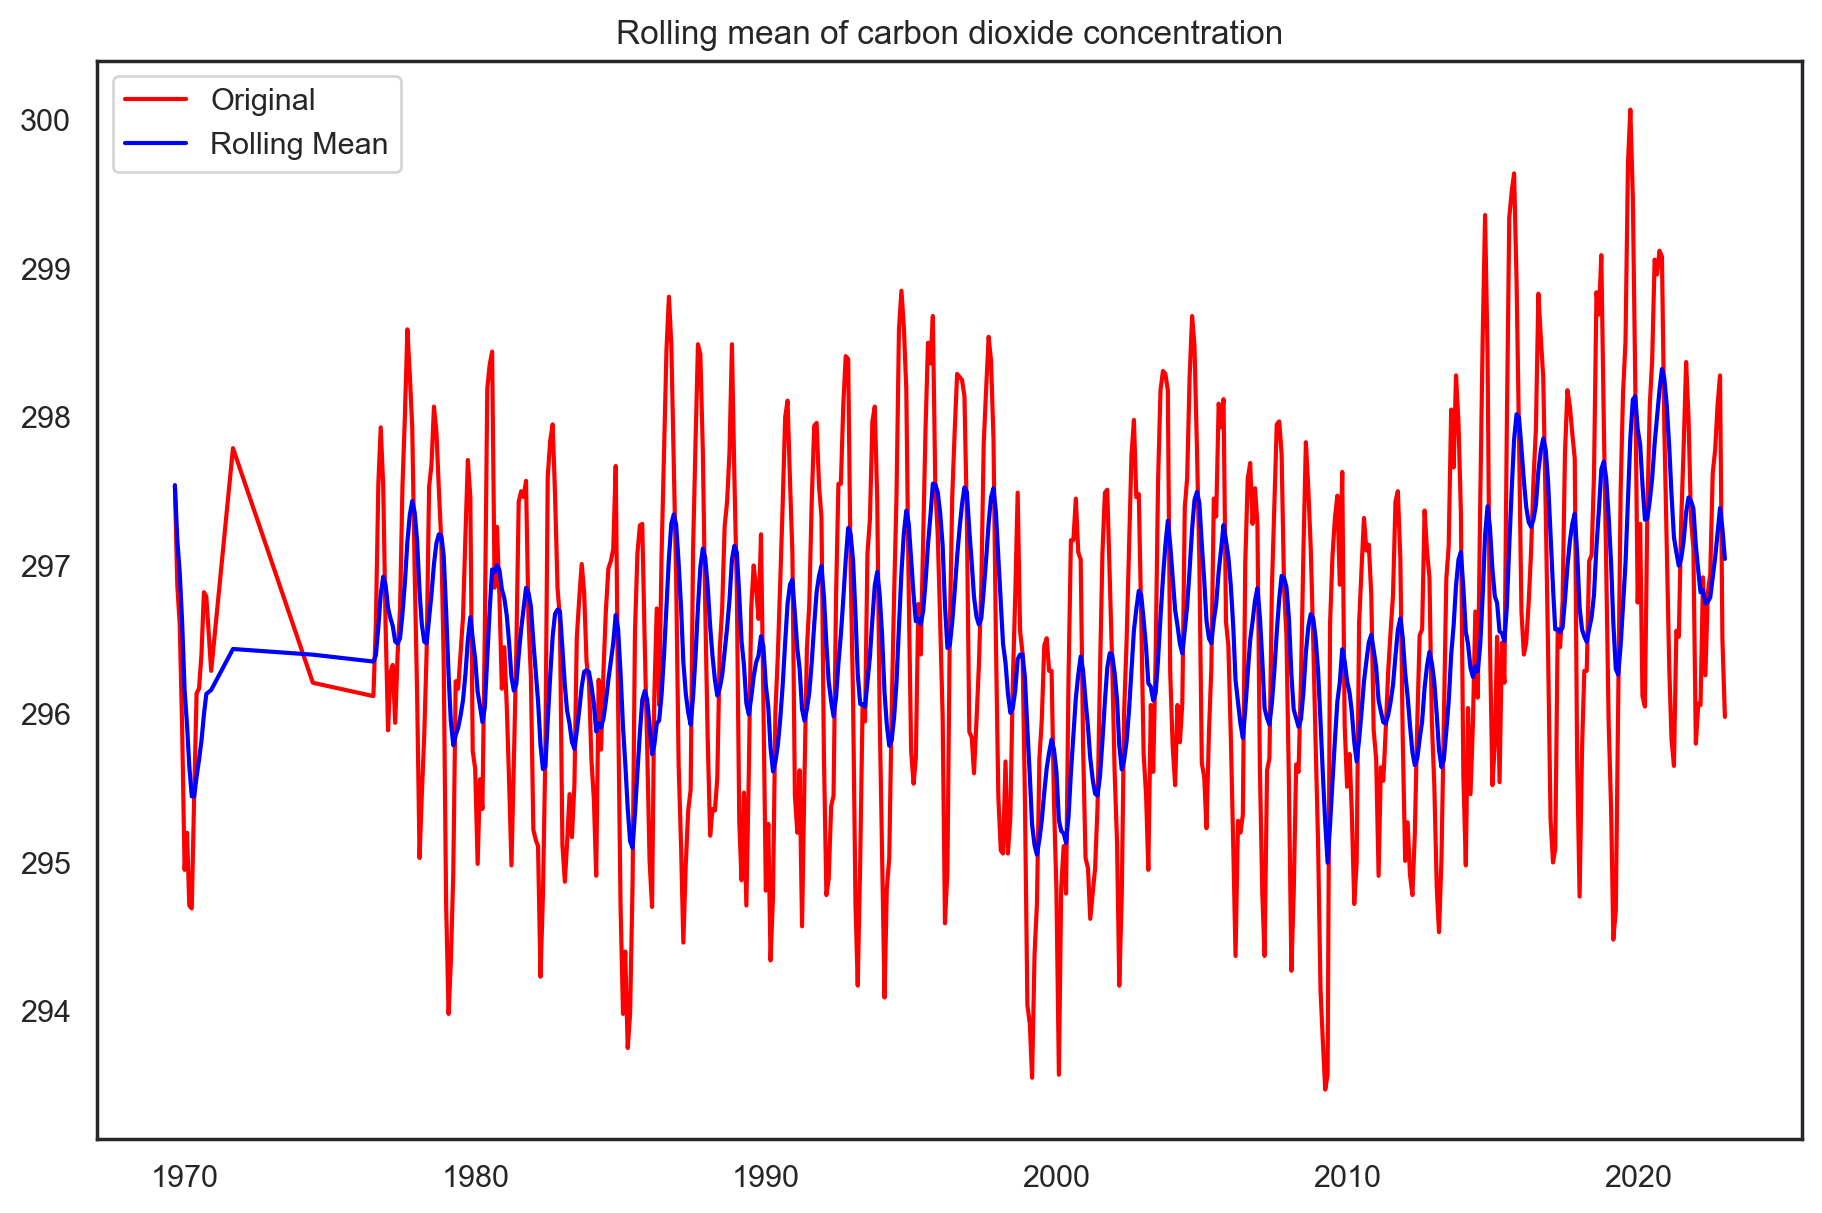

In [412]:
# Plot the transformed values
fig = plt.figure(figsize=(11,7), dpi=200)
plt.plot(hil_monthly['Average Monthly Temperature'], color='red', label='Original')
plt.plot(hil_roll['Average Monthly Temperature']**2, color='blue', label='Rolling Mean')
plt.title('Rolling mean of carbon dioxide concentration')
plt.legend(loc='best')

plt.show(block=False)

The data does seem to be less noisy although there is still seasonality in the data. To check if the data is stationary, we can plot the dataframe holding the subtracted means, `df_minus_roll`.

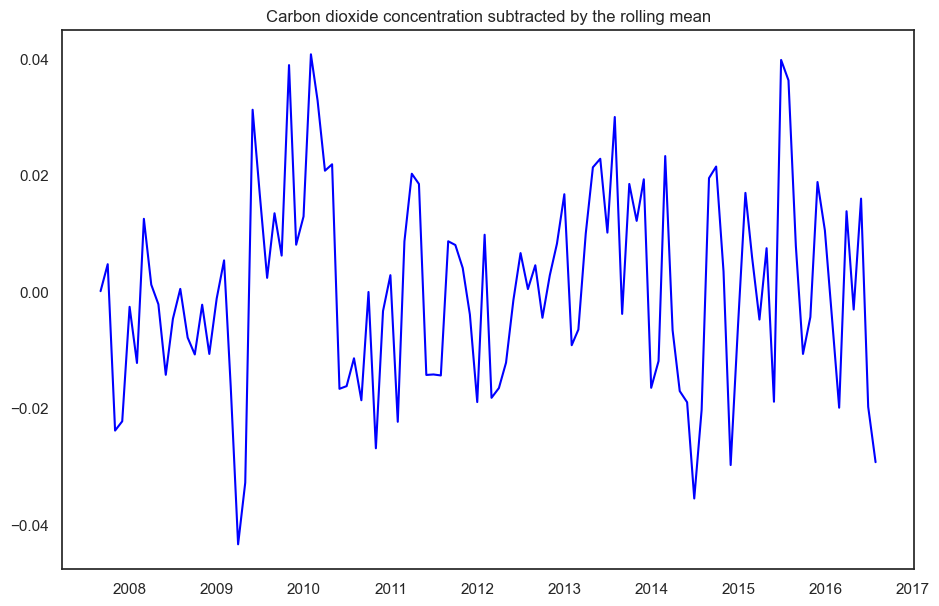

In [413]:
fig = plt.figure(figsize=(11,7))
plt.plot(hil_minus_roll['Average Monthly Temperature'], color='blue')
plt.title('Carbon dioxide concentration subtracted by the rolling mean')

plt.show(block=False)

It appears to be stationary but we can check further by performing the Dickey-Fuller test to calculate the p-value. If the p-value is lower than 0.05, we can confidently say that it is stationary. The p-value will be calculated by using `adfuller()` from `statsmodels`.

In [363]:
from statsmodels.tsa.stattools import adfuller

def stationarity_check(df):
    
    dftest = adfuller(df)
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [364]:
# Run the stationarity check to determine if the data is stationary
# Some dataframes have null values, this can be fixed by adding .dropna()
stationarity_check(hil_minus_roll['value'].dropna())

Test Statistic                 -3.336484
p-value                         0.013324
#Lags Used                     11.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64


We are able to create stationary data for all columns except for the average monthly temperature of San Francisco (`san_minus_roll['Average Monthly Temperature']`). However, the rest of the data is ready for modeling.

__Correlation after reducing noise__
<br>Before creating a model, we will recalculate the correlation in hopes to see if the correlations are stronger.

In [407]:
# Average temperature correlation with carbon dioxide concentration
print('Boulder, CO', bou_roll[['Average Monthly Temperature', 'value']].corr(),
      '\n\nHilo International, HI', hil_roll[['Average Monthly Temperature', 'value']].corr(),
      '\n\nHohenpeissenberg, GM', hoh_roll[['Average Monthly Temperature', 'value']].corr(),
      '\n\nCape Florida, FL', cap_roll[['Average Monthly Temperature', 'value']].corr(),
      '\n\nLos Angeles, CA', los_roll[['Average Monthly Temperature', 'value']].corr(),
      '\n\nSan Francisco, CA', san_roll[['Average Monthly Temperature', 'value']].corr(),
      '\n\nVestmannaeyjar, IC', ice_roll[['Average Monthly Temperature', 'value']].corr(),
      '\n\nTemple, TX', tem_roll[['Average Monthly Temperature', 'value']].corr())

Boulder, CO                              Average Monthly Temperature     value
Average Monthly Temperature                     1.000000 -0.183239
value                                          -0.183239  1.000000 

Hilo International, HI                              Average Monthly Temperature     value
Average Monthly Temperature                     1.000000  0.314694
value                                           0.314694  1.000000 

Hohenpeissenberg, GM                              Average Monthly Temperature     value
Average Monthly Temperature                     1.000000 -0.165817
value                                          -0.165817  1.000000 

Cape Florida, FL                              Average Monthly Temperature     value
Average Monthly Temperature                     1.000000  0.467416
value                                           0.467416  1.000000 

Los Angeles, CA                              Average Monthly Temperature     value
Average Monthly Temperature     

In [408]:
# Correlation between precipitation and carbon dioxide concentration
print('Boulder, CO', bou_roll[['Total Monthly Precipitation', 'value']].corr(),
      '\n\nHilo International, HI', hil_roll[['Total Monthly Precipitation', 'value']].corr(),
      '\n\nHohenpeissenberg, GM', hoh_roll[['Total Monthly Precipitation', 'value']].corr(),
      '\n\nCape Florida, FL', cap_roll[['Total Monthly Precipitation', 'value']].corr(),
      '\n\nLos Angeles, CA', los_roll[['Total Monthly Precipitation', 'value']].corr(),
      '\n\nSan Francisco, CA', san_roll[['Total Monthly Precipitation', 'value']].corr(),
      '\n\nVestmannaeyjar, IC', ice_roll[['Total Monthly Precipitation', 'value']].corr(),
      '\n\nTemple, TX', tem_roll[['Total Monthly Precipitation', 'value']].corr())

Boulder, CO                              Total Monthly Precipitation     value
Total Monthly Precipitation                     1.000000  0.369251
value                                           0.369251  1.000000 

Hilo International, HI                              Total Monthly Precipitation     value
Total Monthly Precipitation                     1.000000 -0.026997
value                                          -0.026997  1.000000 

Hohenpeissenberg, GM                              Total Monthly Precipitation     value
Total Monthly Precipitation                     1.000000 -0.142979
value                                          -0.142979  1.000000 

Cape Florida, FL                              Total Monthly Precipitation     value
Total Monthly Precipitation                     1.000000  0.053542
value                                           0.053542  1.000000 

Los Angeles, CA                              Total Monthly Precipitation     value
Total Monthly Precipitation     

The correlation between temperature and carbon dioxide seem to have gotten stronger. However there are few cities with a very weak correlation between precipitation and CO2 emission (Hilo International, Cape Florida, Los Angeles, and Temple). According to [this article](https://www.downtoearth.org.in/news/climate-change/rising-co2-can-lead-to-drier-amazon-and-bring-more-rain-in-african-and-pacific-forests-60682#:~:text=Scientists%20have%20discovered%20another%20factor,in%20African%20and%20Indonesian%20forests.), the rising carbon dioxide level in the Amazon leads to more rainfall in African and Pacific forests. The article sites a [study](https://www.nature.com/articles/s41558-018-0144-7), where the stomata of the leaves do not have to open so widely in the presence of carbon dioxide. As a result, transpiration (process in which leaves lose water through the stomata) decreases. This leads to drier climates, but as the surface temperature increases, some areas may experience more rainfall due to trade winds now able to hold more moisture. This may be the reason why some areas like Hilo International are experiencing more precipitation.

# Linear regression model
___
Now that the noise of the data is limited, we will start with a simple linear regression model as the temperature and precipitation should not be changing expontentially or polynomially.

In [414]:
import statsmodels.api as sm

In [423]:
# Function that creates a linear regression and returns the results of the model
def regression(df, target, feature):
    #set the y equal to the target
    y = df[target]
    #the X_baseline is feature
    X_baseline = df[[feature]]
    #create the linear model and store results in baseline_results
    baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
    baseline_results = baseline_model.fit()
    #return the summary of results so we can observe the r-squared value
    #additionly return the mean squared error of the model
    print(baseline_results.summary(),
          '\nMean squared error:',mean_squared_error(y, baseline_results.predict(sm.add_constant(X_baseline)), squared=False))
    return baseline_results

In [424]:
results = regression(hil_roll, 'Average Monthly Temperature', feature)

                                 OLS Regression Results                                
Dep. Variable:     Average Monthly Temperature   R-squared:                       0.099
Model:                                     OLS   Adj. R-squared:                  0.097
Method:                          Least Squares   F-statistic:                     63.09
Date:                         Fri, 05 Jan 2024   Prob (F-statistic):           1.05e-14
Time:                                 22:50:40   Log-Likelihood:                 1535.9
No. Observations:                          576   AIC:                            -3068.
Df Residuals:                              574   BIC:                            -3059.
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [434]:
def graph(df, target, feature, baseline_results):
    fig, ax = plt.subplots(figsize=(20,12), dpi=100)
    
    df.plot.scatter(x=feature, y=target, ax=ax, c='red')
    #plot the linear model using the function results(df)
    sm.graphics.abline_plot(model_results=baseline_results, ax=ax, linewidth=5)

    plt.xticks(fontsize=17)
    plt.yticks(fontsize=17)

    ax.set_xlabel('Carbon Dioxide Concentration', fontsize=20, fontweight='bold')
    ax.set_ylabel(target, fontsize=20, fontweight='bold')

    plt.tight_layout();

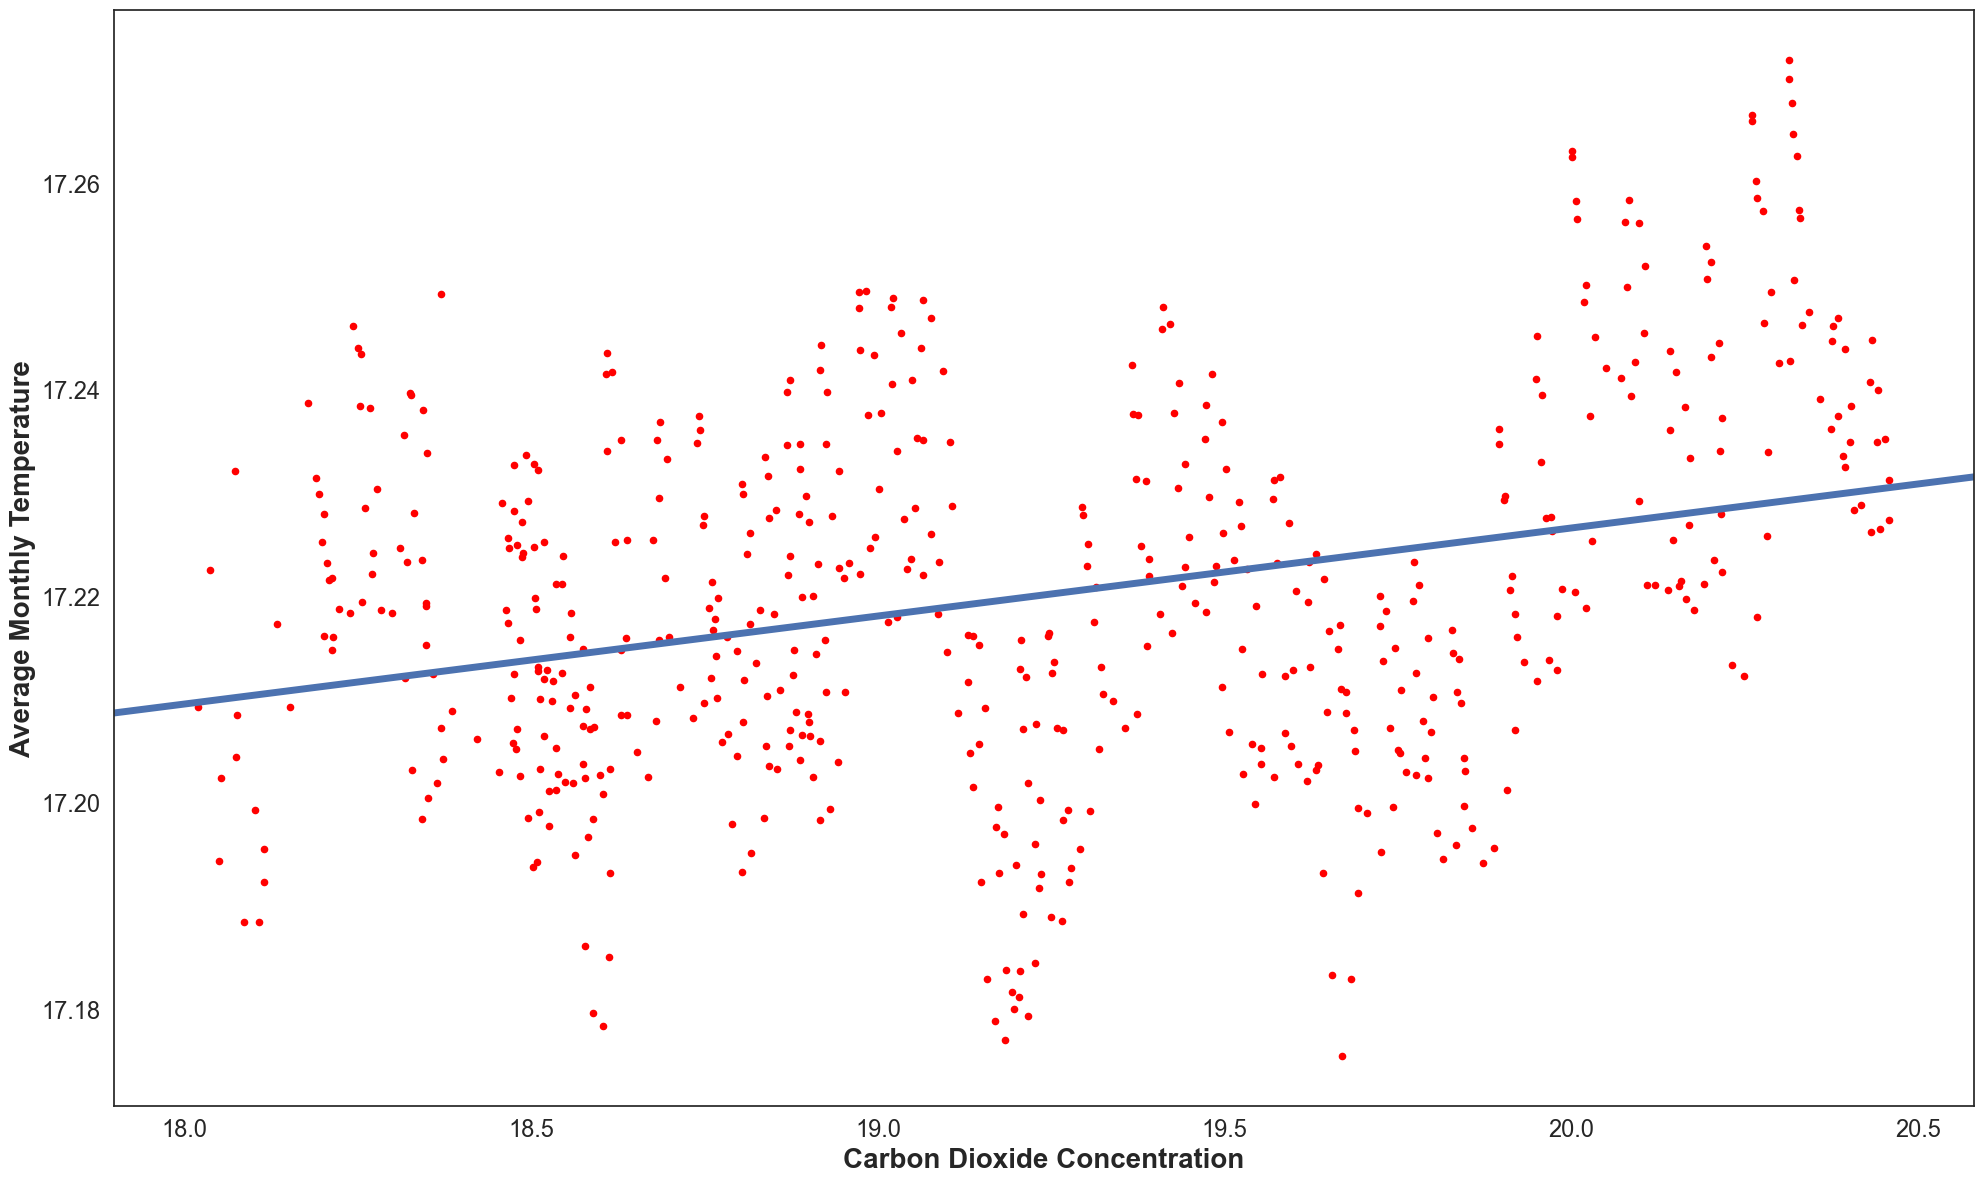

In [435]:
graph(hil_roll, 'Average Monthly Temperature', 'value', results)

In [437]:
results = regression(hil_roll, 'Total Monthly Precipitation', feature)

                                 OLS Regression Results                                
Dep. Variable:     Total Monthly Precipitation   R-squared:                       0.001
Model:                                     OLS   Adj. R-squared:                 -0.001
Method:                          Least Squares   F-statistic:                    0.4186
Date:                         Fri, 05 Jan 2024   Prob (F-statistic):              0.518
Time:                                 23:19:56   Log-Likelihood:                -1185.2
No. Observations:                          576   AIC:                             2374.
Df Residuals:                              574   BIC:                             2383.
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

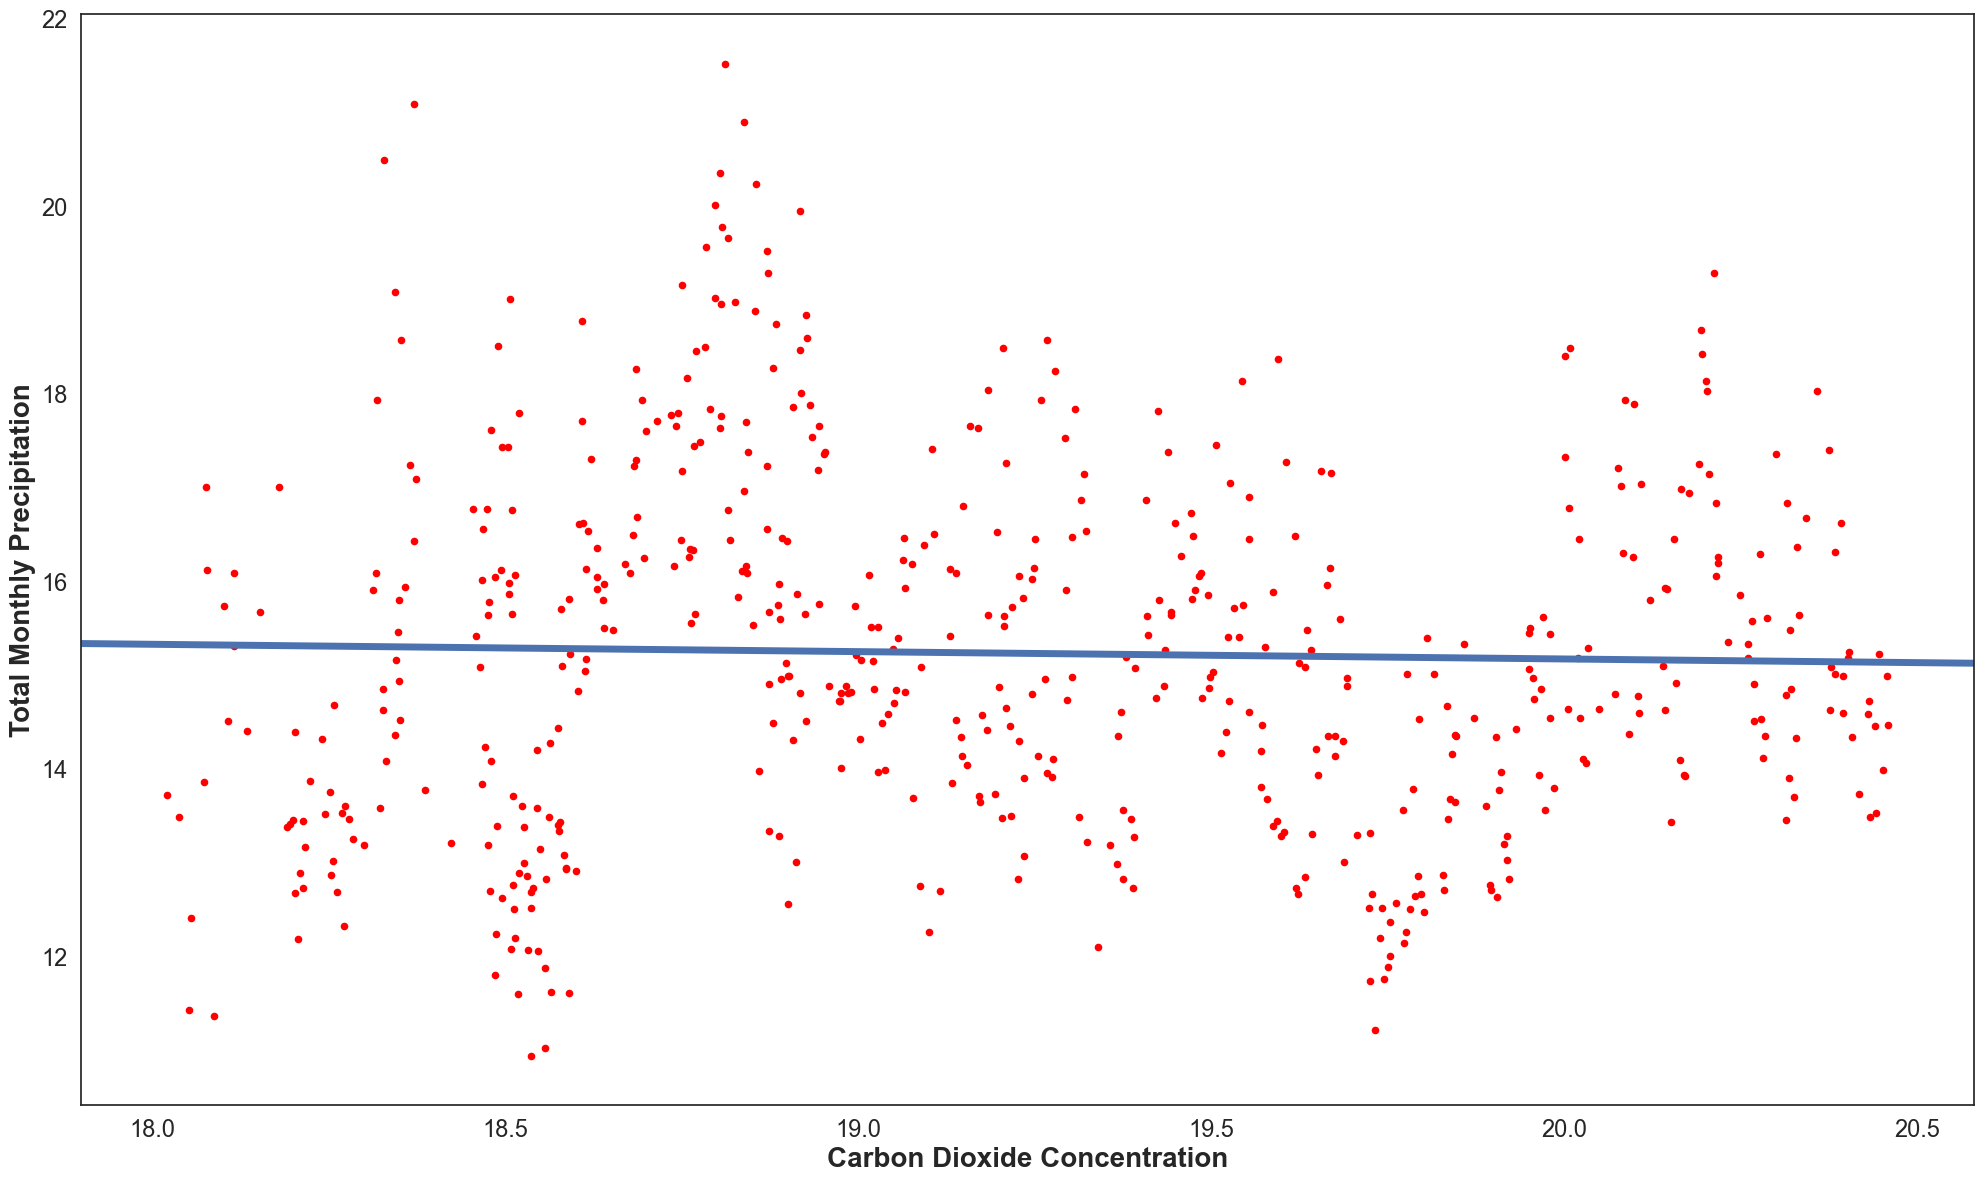

In [438]:
graph(hil_roll, 'Total Monthly Precipitation', 'value', results)

# XGBoost model
___
We will create a XGBoost model where the feature is `value`, the carbon concentration data, and the target is `Average Monthly Temperature` and `Total Monthly Precipitation`. To get the optimal parameters, a grid search will be performed. The performance of the model will be measure by taking the mean squared error.

In [365]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

### Preparing train/test sets
___

In [366]:
from sklearn.model_selection import train_test_split

In [367]:
def XGBoost_model(df, variable):
    # Performing the train test split
    # target and feature is defined from before
    X = df[feature]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    reg = xgb.XGBRegressor(early_stopping_rounds=50)
    # Parameters for GridSearchCV
    parameters = {'nthread':[4],
                  'objective':['reg:linear', 'reg:squarederror'],
                  'learning_rate': [0.1, 0.05, 0.01, 0.005, 0.001],
                  'alpha': [0, 1, 2],
                  'max_depth': [5, 6, 7],
                  'n_estimators':[500, 1000]
                  }
    # GridSearchCV()
    xgb_grid = GridSearchCV(reg,
                            parameters,
                            n_jobs = 5,
                            verbose = 100
                           )
    # Fitting the data to the grid search
    xgb_grid.fit(X_train, y_train[variable],
                eval_set=[(X_train, y_train[variable]),
                          (X_test, y_test[variable])],
                verbose=100)
    # 
    print('Best score:', xgb_grid.best_score_)
    print('Best parameters:', xgb_grid.best_params_)
    
    y_test['predictions'] = xgb_grid.best_estimator_.predict(X_test)
    return y_train, y_test

In [397]:
feature = 'value'
target = ['Average Dew Point Temperature',
          'Average Wind Speed',
          'Total Monthly Precipitation',
          'Monthly Average of the daily percents of possible sunshine',
          'Average Monthly Temperature',
          'Monthly Maximum Temperature',
          'Monthly Minimum Temperature',
          'Relative Humidity']

hil_train, hil_test = XGBoost_model(hil_roll, 'Average Monthly Temperature')

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[18:53:07] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:16.55271	validation_1-rmse:16.55435
[100]	validation_0-rmse:6.07401	validation_1-rmse:6.07566
[200]	validation_0-rmse:2.22892	validation_1-rmse:2.23056
[300]	validation_0-rmse:0.81807	validation_1-rmse:0.81970
[400]	validation_0-rmse:0.30066	validation_1-rmse:0.30225
[500]	validation_0-rmse:0.11150	validation_1-rmse:0.11300
[600]	validation_0-rmse:0.04315	validation_1-rmse:0.04434
[700]	validation_0-rmse:0.01950	validation_1-rmse:0.02074
[800]	validation_0-rmse:0.01236	validation_1-rmse:0.01398
[900]	validation_0-rmse:0.01046	validation_1-rmse:0.01257
[999]	validation_0-rmse:0.00966	validation_1-rmse:0.01238
Best score: 0.46830925435236015
Best parameters: {'alpha': 0, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000, '

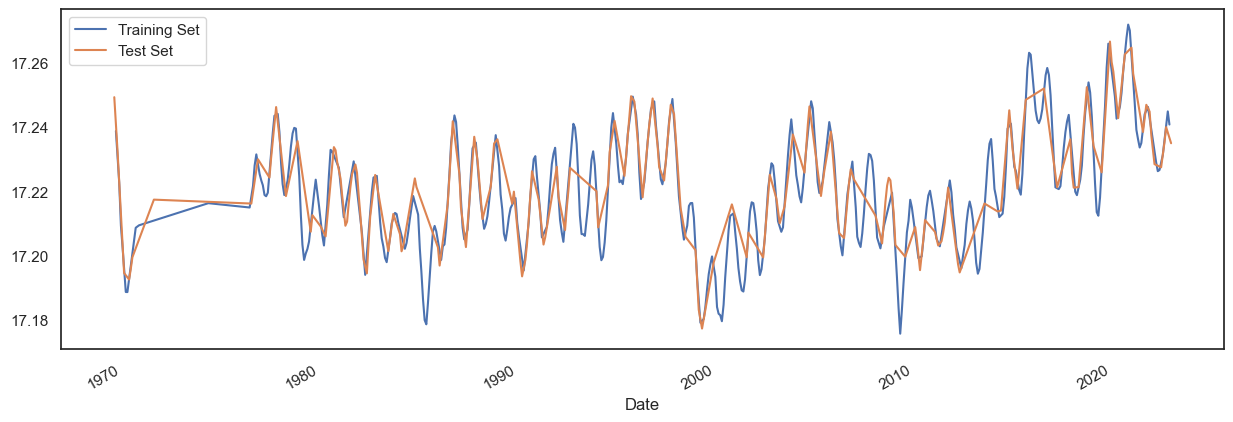

In [399]:
fig, ax = plt.subplots(figsize=(15, 5))
hil_train['Average Monthly Temperature'].plot(ax=ax, label='Training Set')
hil_test['Average Monthly Temperature'].plot(ax=ax, label='Test Set')

plt.legend()
plt.show();

In [473]:
score = np.sqrt(mean_squared_error(hil_test['Average Monthly Temperature'], hil_test['predictions']))
print(f'MSE Score of test set: {score:0.4f}')

MSE Score of test set: 10.6978


| Site        | Score | MSE of test set  |
|-------------:| :--------:|:-----------:|
| Boulder, CO  | -0.2777 | 0.0939 |
| Hilo International, HI | 0.4683 | 0.0124 |
| Hohenpeissenberg, GM | 0.07849 | 0.0624 |
| Cape Florida, FL | 0.13622 | 0.0297 |
| Los Angeles, CA | 0.10141 | 0.0424 |
| San Francisco, CA | 0.02760 | 0.0254 |
| Vestmannaeyjar, IC | 0.04004 | 0.0400 |
| Temple, TX | 0.08986 | 0.0894 |

| Site        | Alpha | Learning Rate| Max Depth | Number of estimators |
|-------------:| :--------:|:-----------:|:-----------:|:-----------:|
| Boulder, CO  | 1 | 0.05 | 5 | 500 |
| Hilo International, HI | 0 | 0.01 | 5 | 1000 |
| Hohenpeissenberg, GM | 0 | 0.01 | 5 | 1000 |
| Cape Florida, FL | 1 | 0.1| 5 | 500 |
| Los Angeles, CA | 0 | 0.01 | 5 | 1000 |
| San Francisco, CA | 0 | 0.1 | 5 | 500 |
| Vestmannaeyjar, IC | 1 | 0.5 | 5 | 500 |
| Temple, TX | 0 | 0.01 | 6 | 1000 |

In [471]:
hil_train, hil_test = XGBoost_model(tem_roll, 'Total Monthly Precipitation')

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[00:54:51] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.71941	validation_1-rmse:5.56010
[100]	validation_0-rmse:0.61179	validation_1-rmse:0.85788
[103]	validation_0-rmse:0.61117	validation_1-rmse:0.85795
Best score: 0.20267887401270243
Best parameters: {'alpha': 2, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear'}


In [472]:
score = np.sqrt(mean_squared_error(hil_test['Average Monthly Temperature'], hil_test['predictions']))
print(f'MSE Score of test set: {score:0.4f}')

RMSE Score of test set: 10.6978


| Site        | Score | MSE of test set  |
|-------------:| :--------:|:-----------:|
| Boulder, CO  | -0.1690 | 10.7245 |
| Hilo International, HI | 0.3088 | 2.4810 |
| Hohenpeissenberg, GM | 0.0710 | 7.4008 |
| Cape Florida, FL | 0.02428 | 7.7557 |
| Los Angeles, CA | -0.1548 | 14.1646 |
| San Francisco, CA | -0.1926 | 12.4207 |
| Vestmannaeyjar, IC | 0.2856 | 5.5303 |
| Temple, TX | 0.2027 | 10.6978 |

| Site        | Alpha | Learning Rate| Max Depth | Number of estimators |
|-------------:| :--------:|:-----------:|:-----------:|:-----------:|
| Boulder, CO  | 2 | 0.01 | 6 | 1000 |
| Hilo International, HI | 1 | 0.1 | 5 | 500 |
| Hohenpeissenberg, GM | 2 | 0.05 | 7 | 500 |
| Cape Florida, FL | 2 | 0.005 | 5 | 1000 |
| Los Angeles, CA | 2 | 0.05 | 5 | 500 |
| San Francisco, CA | 2 | 0.05 | 6 | 500 |
| Vestmannaeyjar, IC | 2 | 0.05 | 5 | 500 |
| Temple, TX | 2 | 0.1 | 5 | 500 |